In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
from IPython.display import HTML as html_print
from termcolor import colored
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_1 = pd.read_csv("/content/01 renewable-share-energy.csv")

In [4]:
df_1.head(10)


,Entity,Code,Year,Renewables (% equivalent primary energy)
0,Africa,NaN,1965,5.747
1,Africa,NaN,1966,6.122
2,Africa,NaN,1967,6.326
3,Africa,NaN,1968,7.005
4,Africa,NaN,1969,7.956
5,Africa,NaN,1970,9.162
6,Africa,NaN,1971,8.131
7,Africa,NaN,1972,8.748
8,Africa,NaN,1973,8.542
9,Africa,NaN,1974,9.268


In [5]:
def print_section_title(title):
    print(colored(title, 'blue', attrs=['bold', 'underline']))

def display_head_and_tail(dataframe, head=5):
    display(dataframe.head(head).style.set_caption("Head"))
    display(dataframe.tail(head).style.set_caption("Tail"))

def display_na(dataframe):
    na_df = dataframe.isnull().sum().reset_index()
    na_df.columns = ['Column', 'Number of NA']
    display(na_df.style.set_caption("Number of NA Values"))

def display_quantiles(dataframe):
    quantiles_df = dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T
    display(quantiles_df.style.format("{:.2f}").set_caption("Quantiles"))

def check_df(dataframe, head=5):
    print_section_title('Shape')
    print(dataframe.shape)
    print_section_title('Types')
    print(dataframe.dtypes.to_frame('Data Type').style.set_caption("Data Types"))
    print_section_title('Head & Tail')
    display_head_and_tail(dataframe, head)
    print_section_title('NA Values')
    display_na(dataframe)
    print_section_title('Quantiles')
    display_quantiles(dataframe)

check_df(df_1)

Shape
(5603, 4)
Types
Head & Tail


,Entity,Code,Year,Renewables (% equivalent primary energy)
0,Africa,nan,1965,5.747495
1,Africa,nan,1966,6.122062
2,Africa,nan,1967,6.325731
3,Africa,nan,1968,7.005293
4,Africa,nan,1969,7.956088


,Entity,Code,Year,Renewables (% equivalent primary energy)
5598,World,OWID_WRL,2017,11.355979
5599,World,OWID_WRL,2018,11.741059
5600,World,OWID_WRL,2019,12.237987
5601,World,OWID_WRL,2020,13.455194
5602,World,OWID_WRL,2021,13.470907


NA Values


,Column,Number of NA
0,Entity,0
1,Code,1311
2,Year,0
3,Renewables (% equivalent primary energy),0


Quantiles


,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Year,5603.00,1993.80,16.28,1965.00,1965.00,1968.00,1994.00,2019.00,2021.00,2021.00,2021.00
Renewables (% equivalent primary energy),5603.00,10.74,12.92,0.00,0.00,0.00,6.52,34.56,67.37,86.87,86.87


In [6]:
df_1 = df_1.drop(columns=['Code'])


In [7]:
df_1.head()


,Entity,Year,Renewables (% equivalent primary energy)
0,Africa,1965,5.747
1,Africa,1966,6.122
2,Africa,1967,6.326
3,Africa,1968,7.005
4,Africa,1969,7.956


In [8]:
df_1.isnull().sum()


Entity                                      0
Year                                        0
Renewables (% equivalent primary energy)    0
dtype: int64

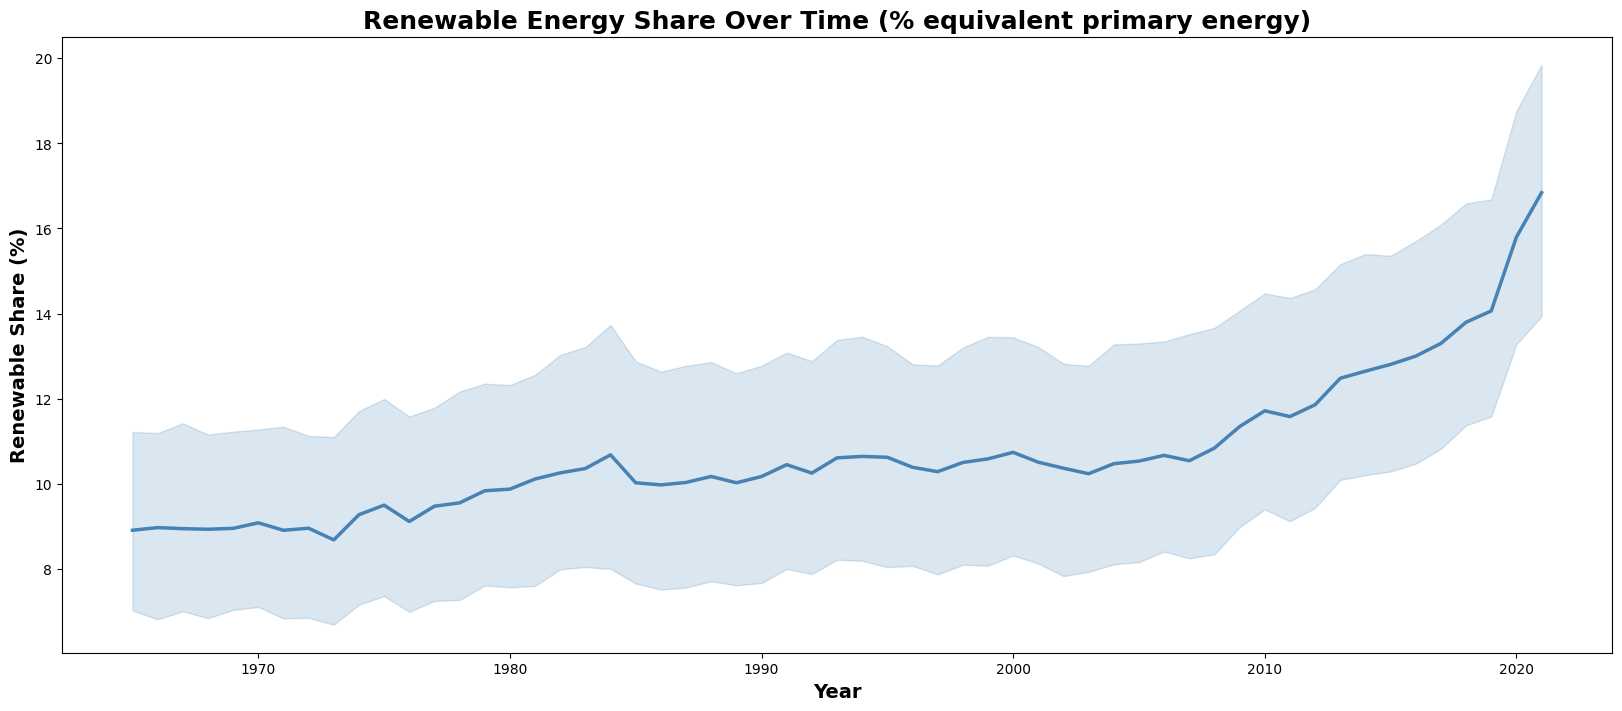

In [9]:
title_font_size = 18
label_font_size = 14
line_width = 2.5

plt.figure(figsize=(20, 8))
sns.lineplot(x='Year', y='Renewables (% equivalent primary energy)', data=df_1, linewidth=line_width, color='steelblue')

plt.title('Renewable Energy Share Over Time (% equivalent primary energy)', fontsize=title_font_size, fontweight='bold')
plt.xlabel('Year', fontsize=label_font_size, fontweight='bold')
plt.ylabel('Renewable Share (%)', fontsize=label_font_size, fontweight='bold')

plt.show()

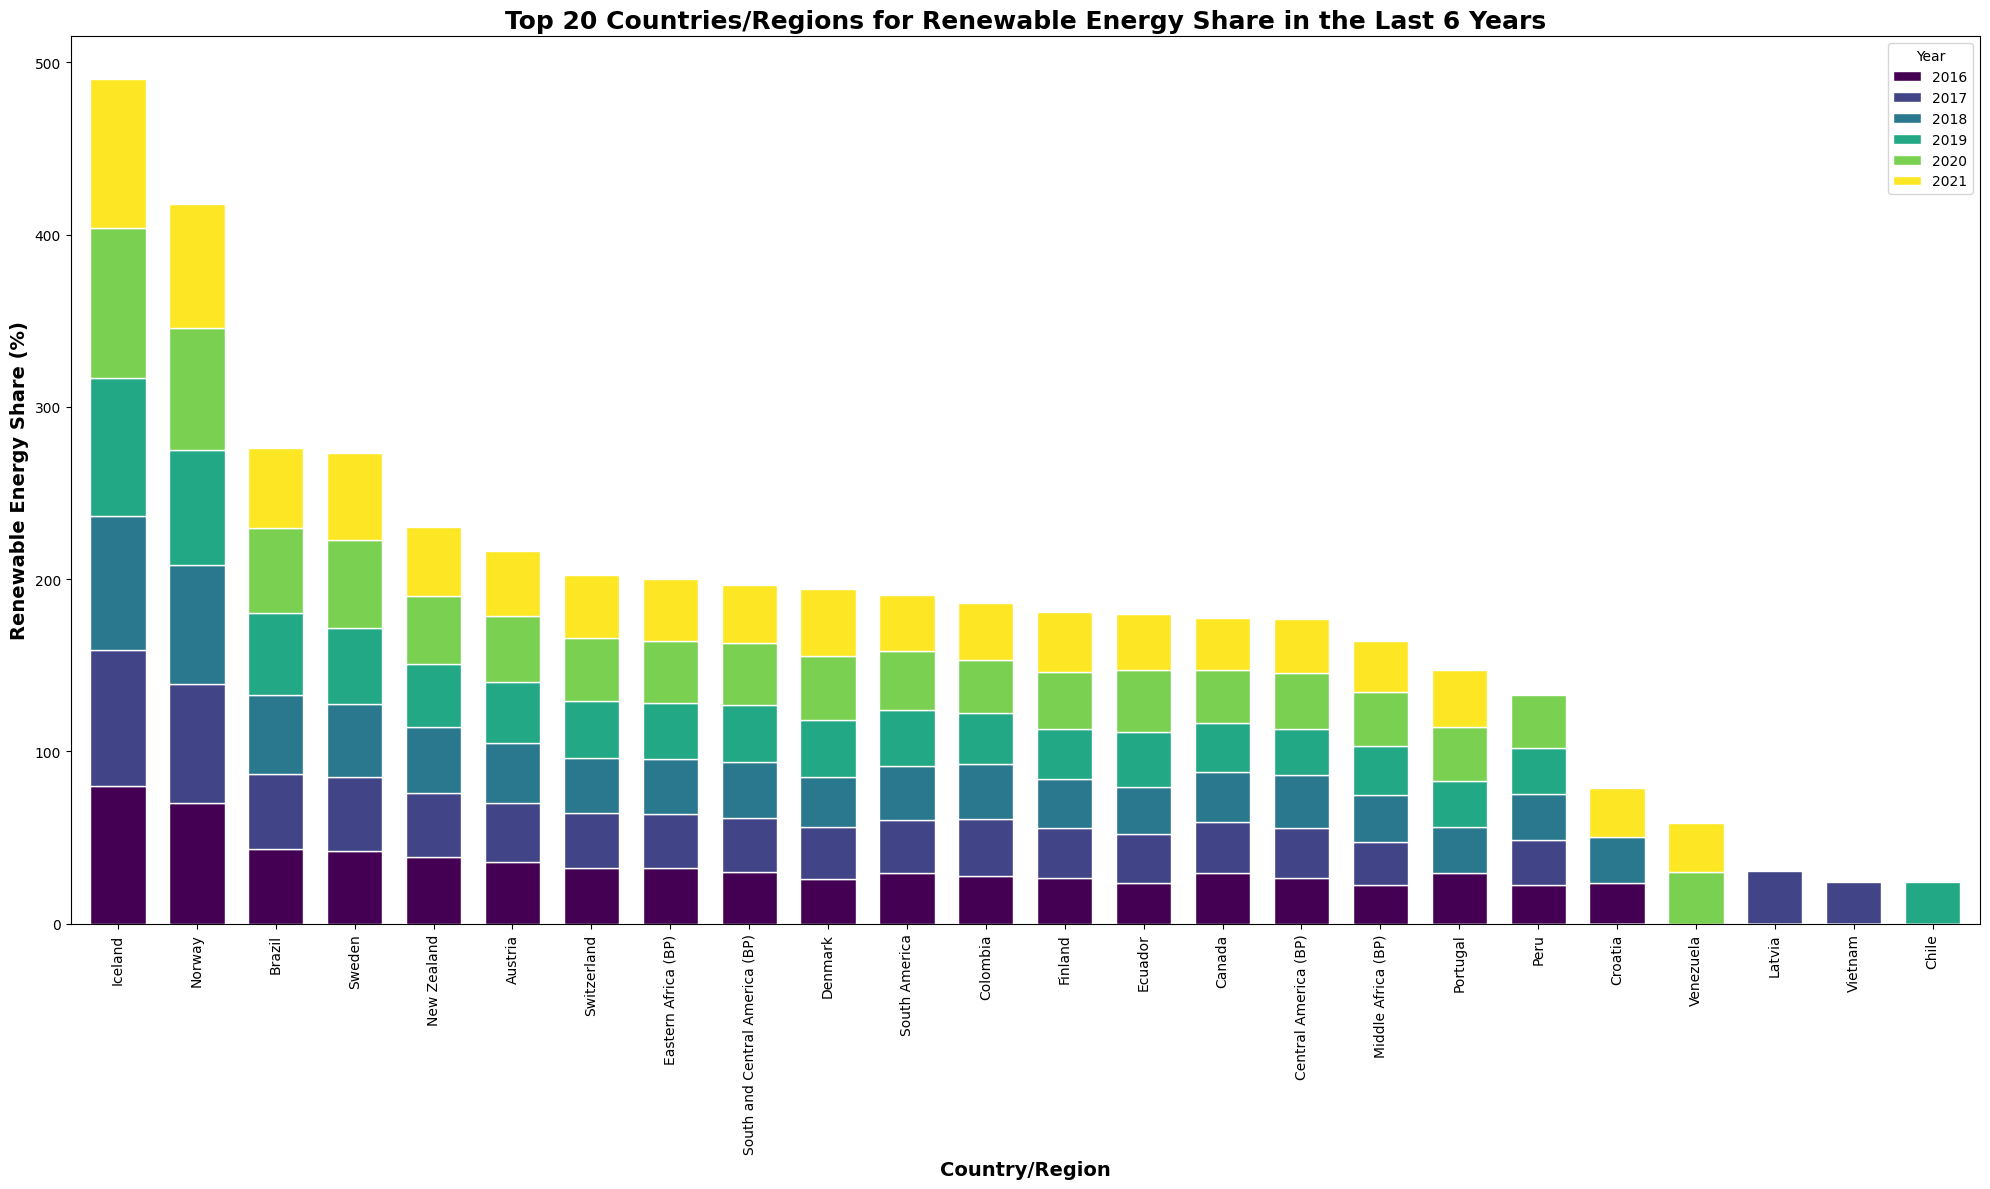

In [10]:
latest_6_years = df_1['Year'].unique()[-6:]

filtered_data = df_1[df_1['Year'].isin(latest_6_years)]

top_20_per_year = filtered_data.groupby('Year').apply(lambda x: x.nlargest(20, 'Renewables (% equivalent primary energy)'))

pivot_data = top_20_per_year.pivot(index='Entity', columns='Year', values='Renewables (% equivalent primary energy)').fillna(0)

sorted_pivot_data = pivot_data.sum(axis=1).sort_values(ascending=False)

sorted_pivot_data = pivot_data.loc[sorted_pivot_data.index]

fig, ax = plt.subplots(figsize=(20, 12))
sorted_pivot_data.plot(kind='bar', stacked=True, ax=ax, colormap='viridis', edgecolor='white', width=0.7)
ax.set_title('Top 20 Countries/Regions for Renewable Energy Share in the Last 6 Years', fontsize=18, fontweight='bold')
ax.set_xlabel('Country/Region', fontsize=14, fontweight='bold')
ax.set_ylabel('Renewable Energy Share (%)', fontsize=14, fontweight='bold')
ax.legend(title='Year', fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

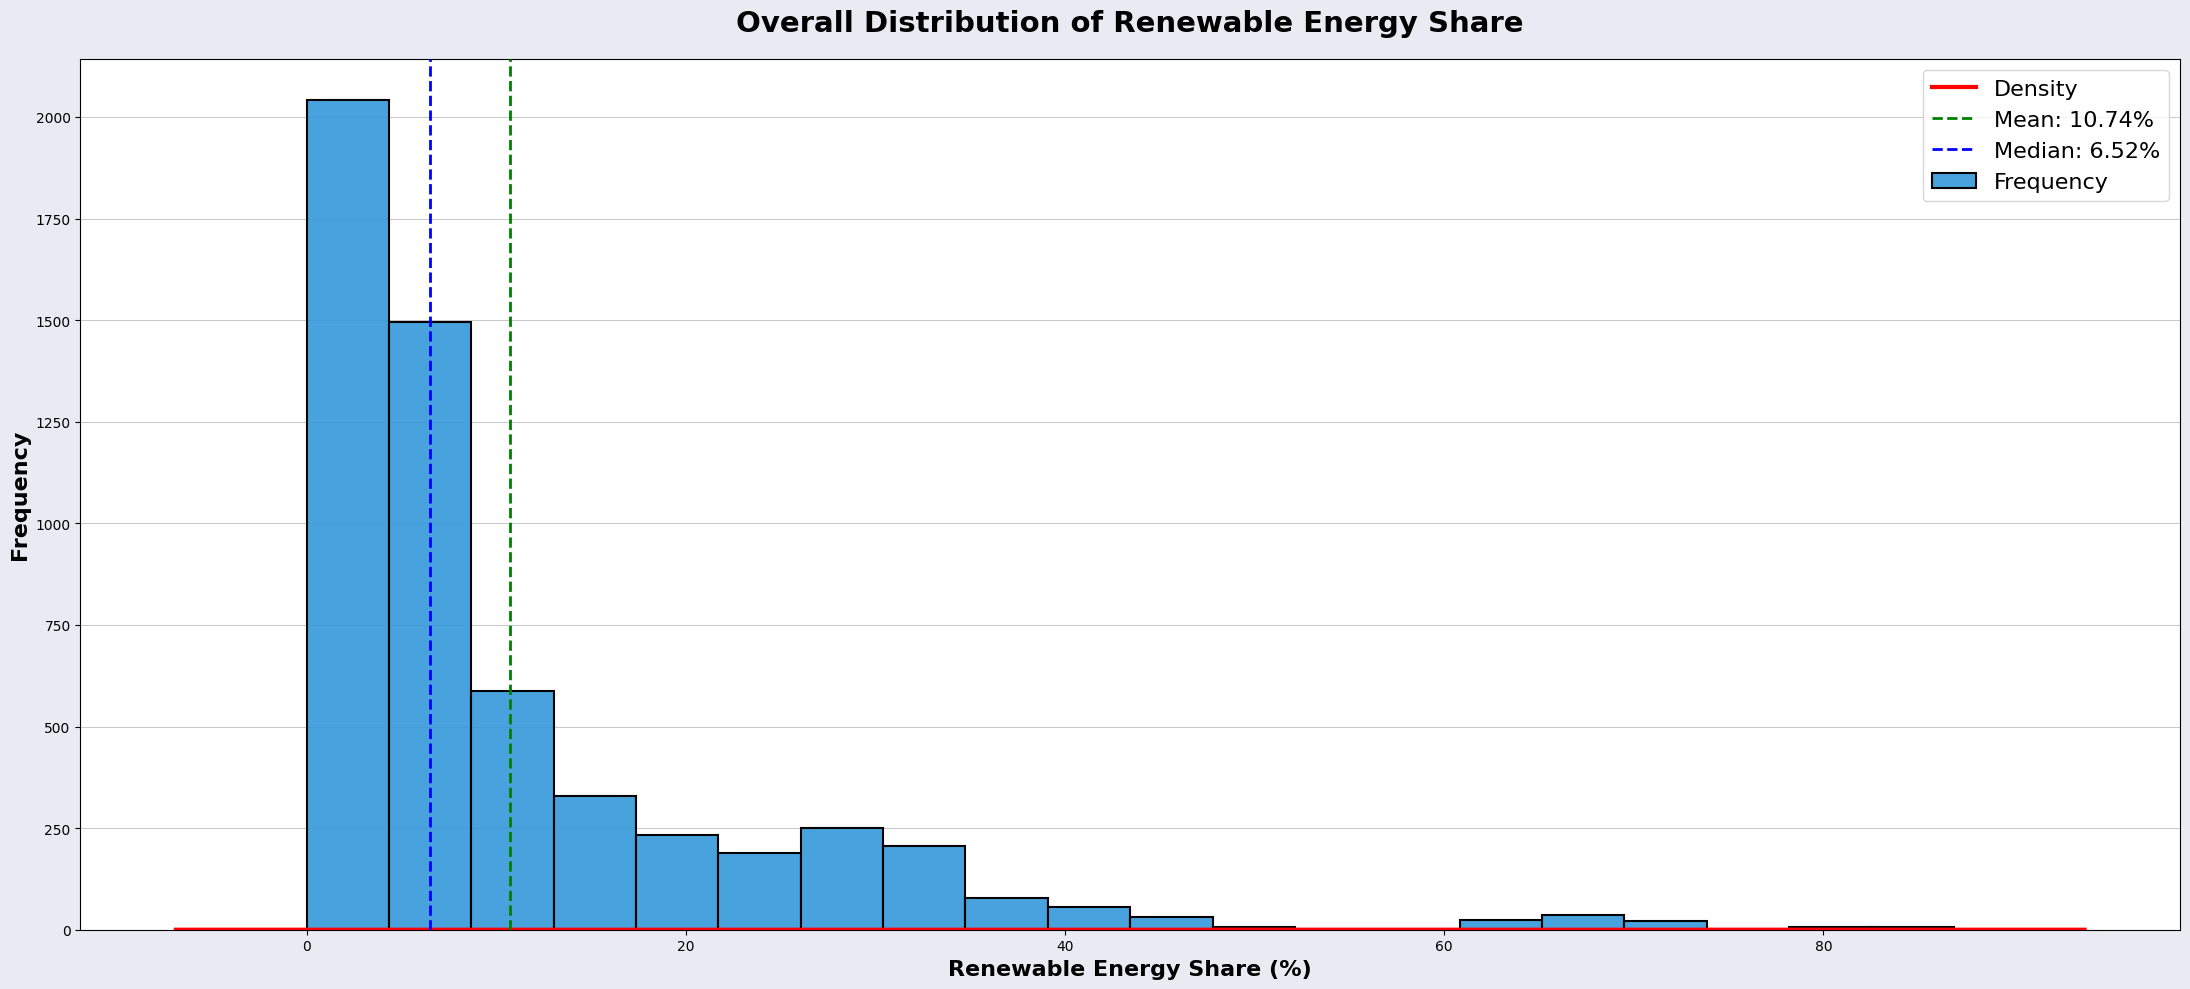

In [11]:
mean_val = df_1['Renewables (% equivalent primary energy)'].mean()
median_val = df_1['Renewables (% equivalent primary energy)'].median()

plt.figure(figsize=(22, 10), facecolor='#EAEAF2')

sns.histplot(df_1['Renewables (% equivalent primary energy)'], bins=20, edgecolor='black', color='#3498db', kde=False, label="Frequency", linewidth=1.5, alpha=0.9, zorder=2)

sns.kdeplot(df_1['Renewables (% equivalent primary energy)'], color='red', lw=3, label="Density", zorder=3)

plt.axvline(mean_val, color='green', linestyle='--', lw=2, label=f'Mean: {mean_val:.2f}%', zorder=4)
plt.axvline(median_val, color='blue', linestyle='--', lw=2, label=f'Median: {median_val:.2f}%', zorder=4)

title_font_size = 21
label_font_size = 16
plt.title('Overall Distribution of Renewable Energy Share', fontsize=title_font_size, fontweight='bold', pad=20, backgroundcolor='#EAEAF2')
plt.xlabel('Renewable Energy Share (%)', fontsize=label_font_size, fontweight='bold')
plt.ylabel('Frequency', fontsize=label_font_size, fontweight='bold')
plt.legend(fontsize=label_font_size, loc="upper right")

plt.grid(axis='y', linestyle='-', linewidth=0.7, alpha=0.7, zorder=1)

plt.tight_layout()
plt.show()

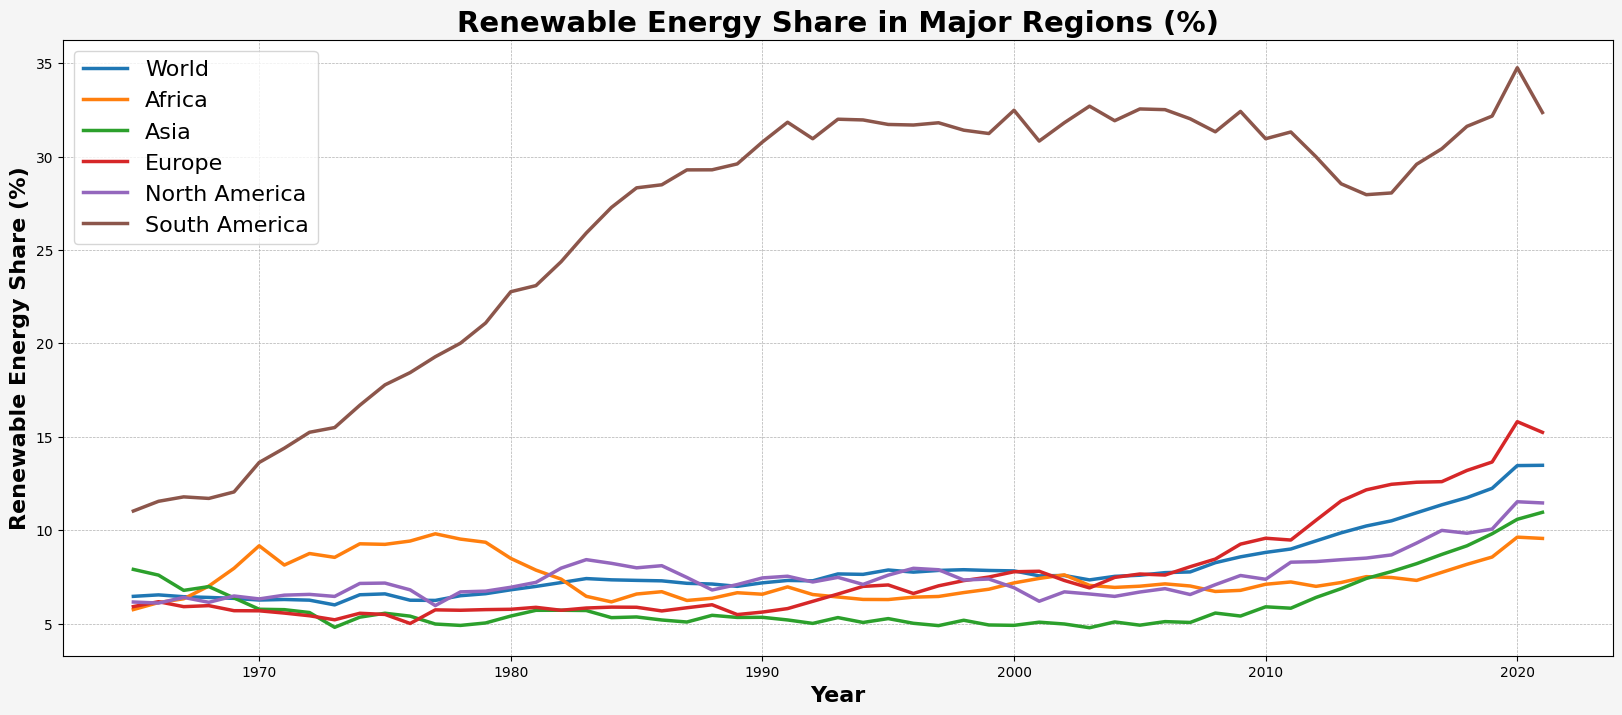

In [12]:
regions = ['World', 'Africa', 'Asia', 'Europe', 'North America', 'South America']

plt.figure(figsize=(20, 8), facecolor='whitesmoke')
for region in regions:
    region_data = df_1[df_1['Entity'] == region]
    plt.plot(region_data['Year'], region_data['Renewables (% equivalent primary energy)'], label=region, linewidth=line_width)


plt.title('Renewable Energy Share in Major Regions (%)', fontsize=title_font_size, fontweight='bold')
plt.xlabel('Year', fontsize=label_font_size, fontweight='bold')
plt.ylabel('Renewable Energy Share (%)', fontsize=label_font_size, fontweight='bold')


plt.legend(fontsize=label_font_size)


plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

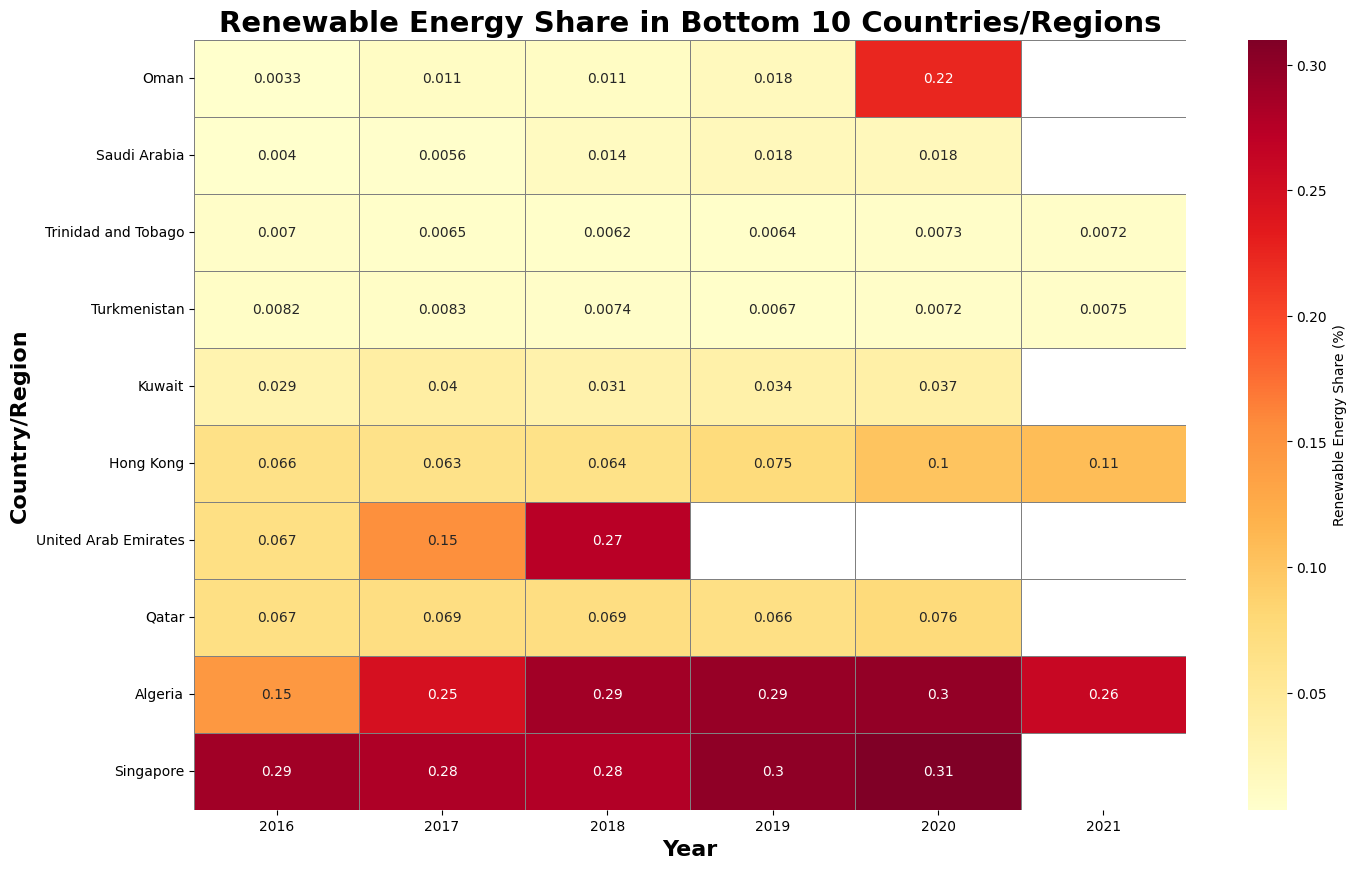

In [13]:
latest_6_years = df_1['Year'].unique()[-6:]

heatmap_data = pd.DataFrame()

for year in latest_6_years:
    specific_year_data = df_1[df_1['Year'] == year]
    bottom_countries_year = specific_year_data.nsmallest(10, 'Renewables (% equivalent primary energy)')
    heatmap_data[year] = bottom_countries_year.set_index('Entity')['Renewables (% equivalent primary energy)']

title_font_size = 21
label_font_size = 16

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Renewable Energy Share (%)'})
plt.title('Renewable Energy Share in Bottom 10 Countries/Regions', fontsize=title_font_size, fontweight='bold')
plt.xlabel('Year', fontsize=label_font_size, fontweight='bold')
plt.ylabel('Country/Region', fontsize=label_font_size, fontweight='bold')
plt.show()

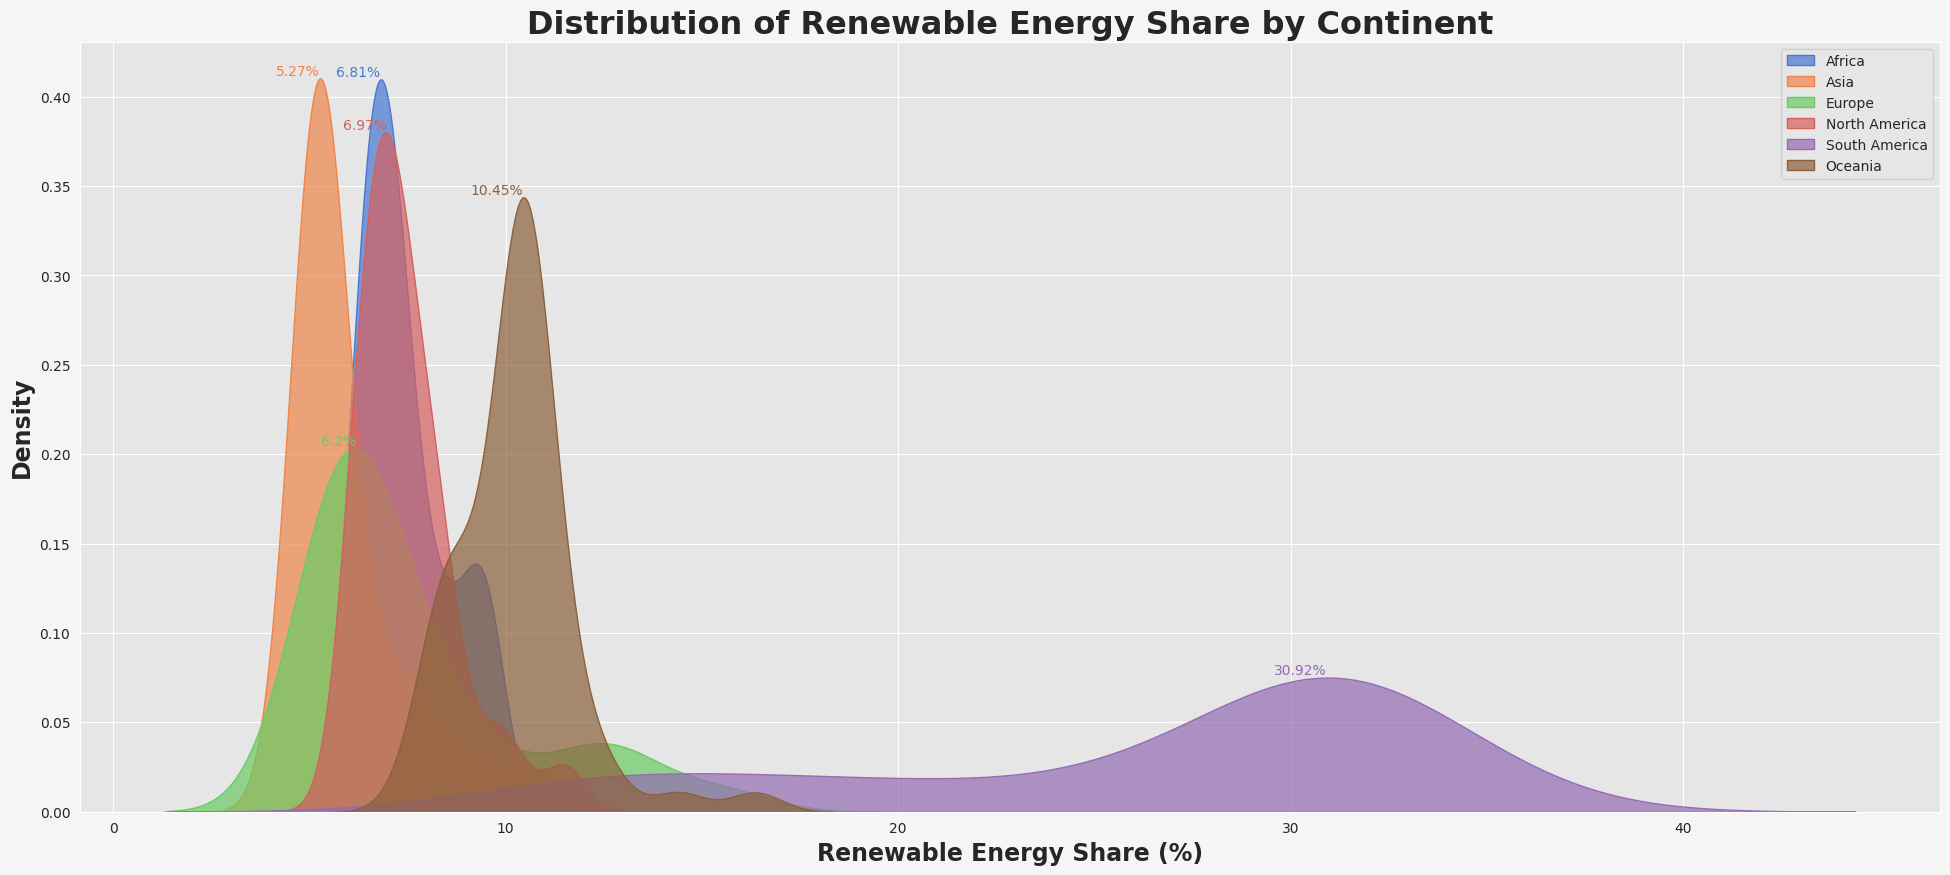

In [14]:
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_palette("muted")

plt.figure(figsize=(24, 10), facecolor='whitesmoke')

for continent, color in zip(continents, sns.color_palette()):
    continent_data = df_1[df_1['Entity'] == continent]
    ax = sns.kdeplot(continent_data['Renewables (% equivalent primary energy)'], fill=True, label=continent, color=color, alpha=0.7)

    y = continent_data['Renewables (% equivalent primary energy)'].values
    x = np.linspace(min(y), max(y), 100)
    kde = stats.gaussian_kde(y)
    max_density_value = x[np.argmax(kde(x))]

    plt.text(max_density_value, kde(max_density_value), f'{round(max_density_value, 2)}%', fontsize=10, verticalalignment='bottom', horizontalalignment='right', color=color)

plt.title('Distribution of Renewable Energy Share by Continent', fontsize=title_font_size + 2, fontweight='bold')
plt.xlabel('Renewable Energy Share (%)', fontsize=label_font_size + 1, fontweight='bold')
plt.ylabel('Density', fontsize=label_font_size + 1, fontweight='bold')
plt.legend(loc='upper right', fontsize='medium')

plt.show()

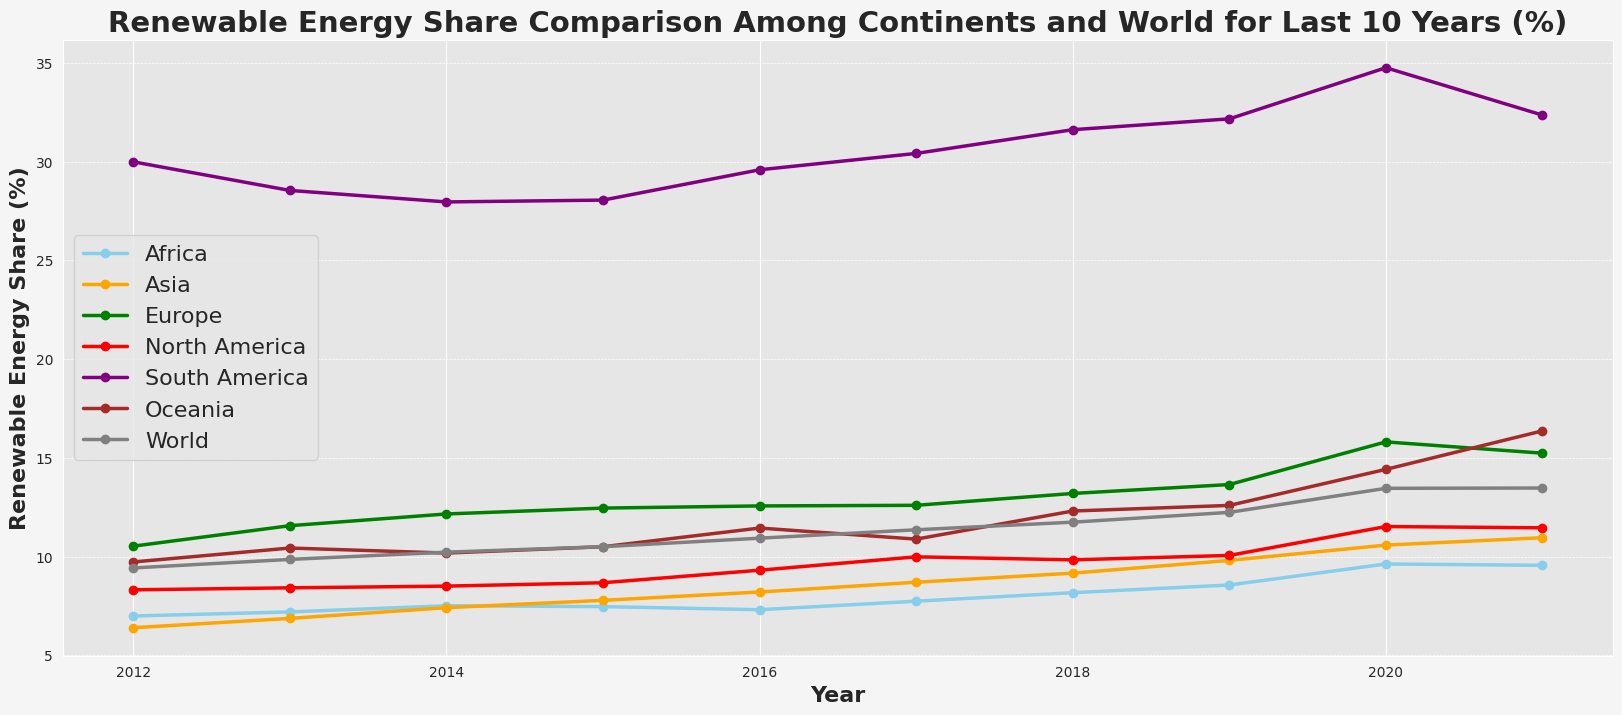

In [15]:
latest_10_years = df_1['Year'].unique()[-10:]
countries_data_last_10_years = df_1[(df_1['Year'].isin(latest_10_years)) & (~df_1['Entity'].isin(regions))]

data_last_10_years = df_1[df_1['Year'].isin(latest_10_years)]

plt.figure(figsize=(20, 8), facecolor='whitesmoke')

color_palette_last_10 = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'gray']

for continent, color in zip(continents + ['World'], color_palette_last_10):
    continent_data = data_last_10_years[data_last_10_years['Entity'] == continent]
    plt.plot(continent_data['Year'], continent_data['Renewables (% equivalent primary energy)'], label=continent, color=color, linewidth=2.5, marker='o')

plt.title('Renewable Energy Share Comparison Among Continents and World for Last 10 Years (%)', fontsize=title_font_size, fontweight='bold')
plt.xlabel('Year', fontsize=label_font_size, fontweight='bold')
plt.ylabel('Renewable Energy Share (%)', fontsize=label_font_size, fontweight='bold')

plt.legend(fontsize=label_font_size)

plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.show()

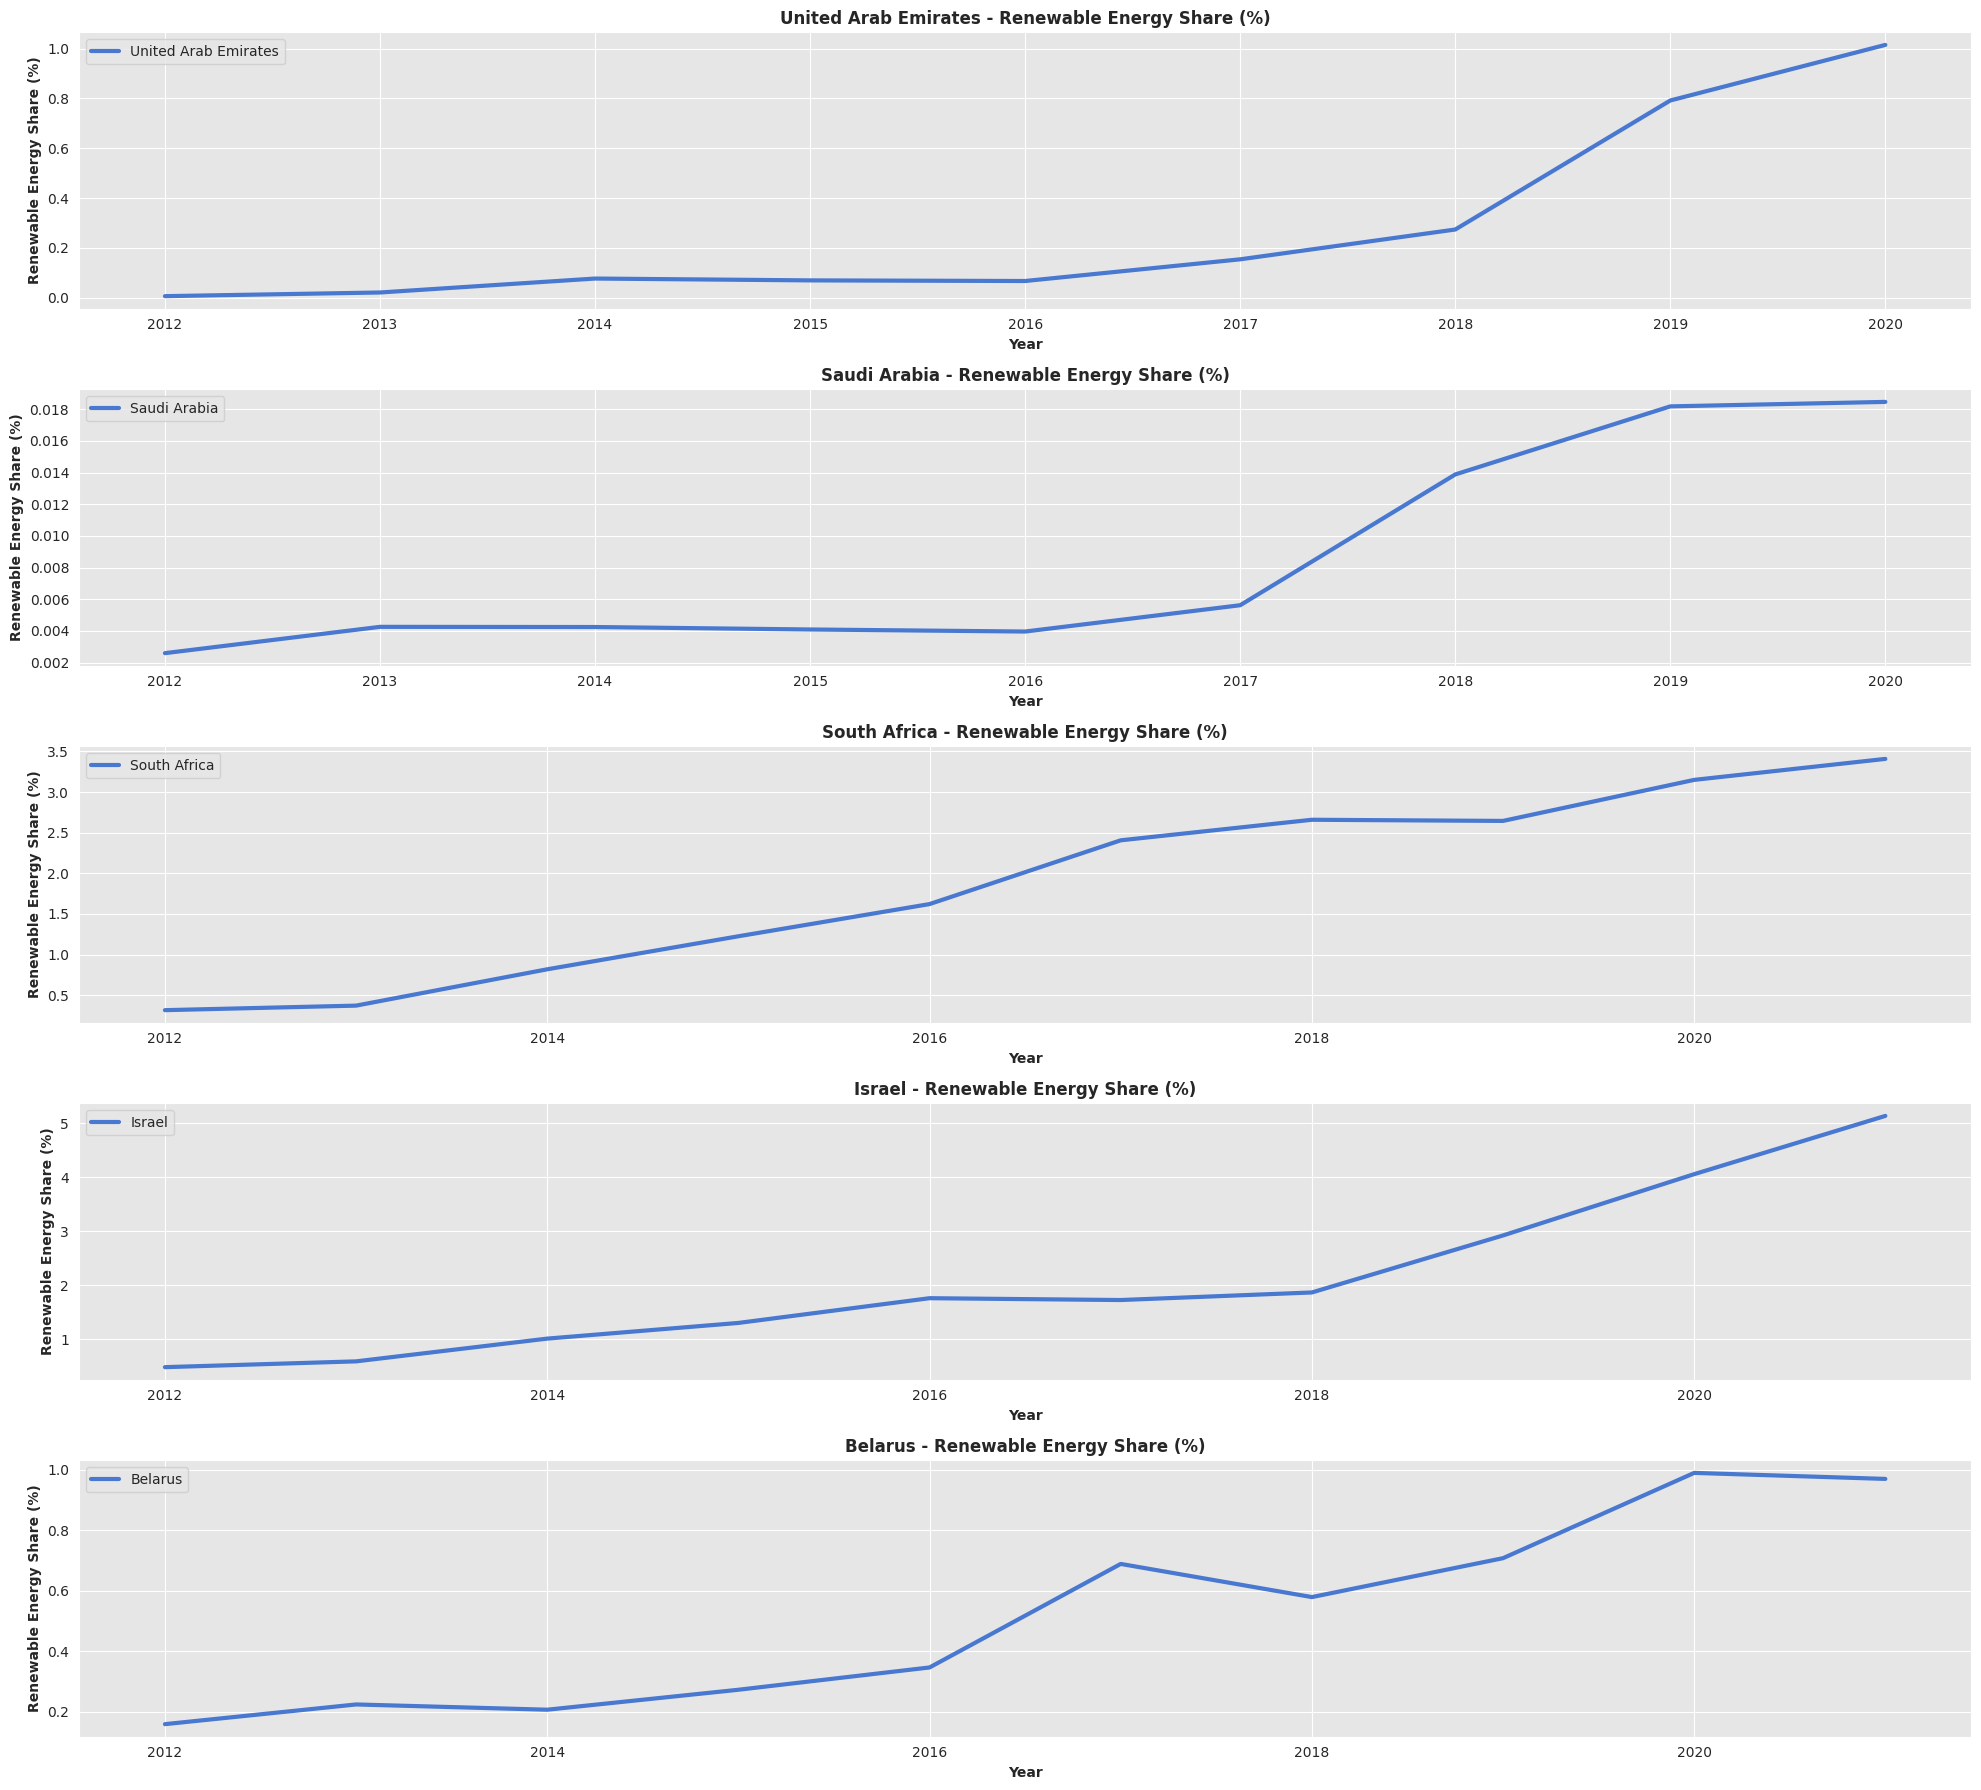

In [16]:
countries_data_last_10_years_copy = countries_data_last_10_years.copy()
countries_data_last_10_years_copy['Yearly_Change'] = countries_data_last_10_years_copy.groupby('Entity')['Renewables (% equivalent primary energy)'].pct_change() * 100

average_growth_last_10_years = countries_data_last_10_years_copy.groupby('Entity')['Yearly_Change'].mean()
top_5_countries_growth = average_growth_last_10_years.nlargest(5)

fig, axes = plt.subplots(5, 1, figsize=(20, 18))
for i, country in enumerate(top_5_countries_growth.index):
    country_data = countries_data_last_10_years_copy[countries_data_last_10_years_copy['Entity'] == country]
    axes[i].plot(country_data['Year'], country_data['Renewables (% equivalent primary energy)'], label=country, linewidth=3)
    axes[i].set_title(f'{country} - Renewable Energy Share (%)', fontweight='bold')
    axes[i].set_xlabel('Year', fontweight='bold')
    axes[i].set_ylabel('Renewable Energy Share (%)', fontweight='bold')
    axes[i].legend(loc='upper left')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


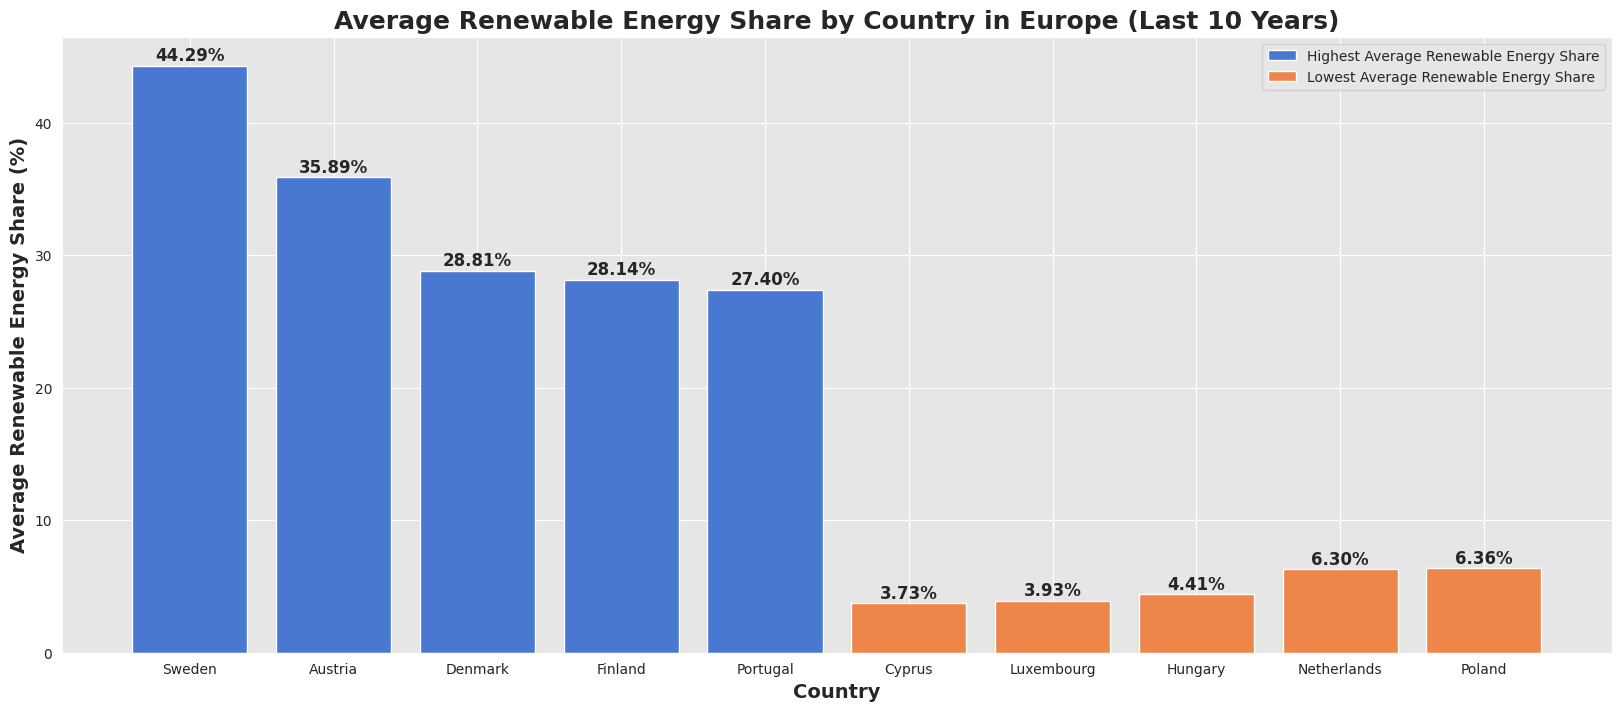

In [17]:
european_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
    'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
    'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom'
]

europe_data_last_10_years = countries_data_last_10_years[countries_data_last_10_years['Entity'].isin(european_countries)]

average_last_10_years_europe = europe_data_last_10_years.groupby('Entity')['Renewables (% equivalent primary energy)'].mean()
top_5_europe_increase = average_last_10_years_europe.nlargest(5)
top_5_europe_decrease = average_last_10_years_europe.nsmallest(5)

plt.figure(figsize=(20, 8))
bars1 = plt.bar(top_5_europe_increase.index, top_5_europe_increase.values, label='Highest Average Renewable Energy Share')
bars2 = plt.bar(top_5_europe_decrease.index, top_5_europe_decrease.values, label='Lowest Average Renewable Energy Share')
plt.title('Average Renewable Energy Share by Country in Europe (Last 10 Years)', fontsize=18, fontweight='bold')  # Bold title
plt.xlabel('Country', fontsize=14, fontweight='bold')  # Bold X-axis label
plt.ylabel('Average Renewable Energy Share (%)', fontsize=14, fontweight='bold')  # Bold Y-axis label
plt.legend()
plt.grid(True)

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()


In [20]:
df_2 = pd.read_csv("/content/02 modern-renewable-energy-consumption.csv")

In [21]:
df_2['Total Renewable Energy Generation - TWh'] = df_2['Solar Generation - TWh'] + df_2['Wind Generation - TWh'] + df_2['Hydro Generation - TWh'] + df_2['Geo Biomass Other - TWh']

In [22]:
df_2.head()


,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Total Renewable Energy Generation - TWh
0,Africa,NaN,1971,0.164,0.000,0.000,26.013,26.177
1,Africa,NaN,1972,0.165,0.000,0.000,29.633,29.798
2,Africa,NaN,1973,0.170,0.000,0.000,31.346,31.516
3,Africa,NaN,1974,0.175,0.000,0.000,35.667,35.842
4,Africa,NaN,1975,0.172,0.000,0.000,37.718,37.890


In [23]:
check_df(df_2)

Shape
(5610, 8)
Types
Head & Tail


,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Total Renewable Energy Generation - TWh
0,Africa,nan,1971,0.164000,0.000000,0.000000,26.013390,26.177390
1,Africa,nan,1972,0.165000,0.000000,0.000000,29.633196,29.798196
2,Africa,nan,1973,0.170000,0.000000,0.000000,31.345707,31.515707
3,Africa,nan,1974,0.175000,0.000000,0.000000,35.667076,35.842076
4,Africa,nan,1975,0.172000,0.000000,0.000000,37.717968,37.889968


,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Total Renewable Energy Generation - TWh
5605,World,OWID_WRL,2017,596.420500,445.466280,1140.393100,4069.982700,6252.262580
5606,World,OWID_WRL,2018,643.032040,576.230900,1269.979200,4183.166500,6672.408640
5607,World,OWID_WRL,2019,674.745360,703.949770,1420.544100,4231.377000,7030.616230
5608,World,OWID_WRL,2020,703.916440,846.229400,1596.428200,4345.990000,7492.564040
5609,World,OWID_WRL,2021,762.782650,1032.501200,1861.939800,4273.827600,7931.051250


NA Values


,Column,Number of NA
0,Entity,0
1,Code,1311
2,Year,0
3,Geo Biomass Other - TWh,144
4,Solar Generation - TWh,168
5,Wind Generation - TWh,165
6,Hydro Generation - TWh,7
7,Total Renewable Energy Generation - TWh,184


Quantiles


,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Year,5610.00,1993.83,16.30,1965.00,1965.00,1968.00,1994.00,2019.00,2021.00,2021.00,2021.00
Geo Biomass Other - TWh,5466.00,13.46,47.64,0.00,0.00,0.00,0.23,79.00,238.08,762.78,762.78
Solar Generation - TWh,5442.00,5.48,39.90,0.00,0.00,0.00,0.00,8.29,155.02,1032.50,1032.50
Wind Generation - TWh,5445.00,15.03,84.73,0.00,0.00,0.00,0.00,44.62,436.48,1861.94,1861.94
Hydro Generation - TWh,5603.00,147.89,390.19,0.00,0.00,0.00,10.69,764.46,1941.31,4345.99,4345.99
Total Renewable Energy Generation - TWh,5426.00,184.40,524.54,0.00,0.00,0.00,13.37,1016.24,2707.23,7931.05,7931.05


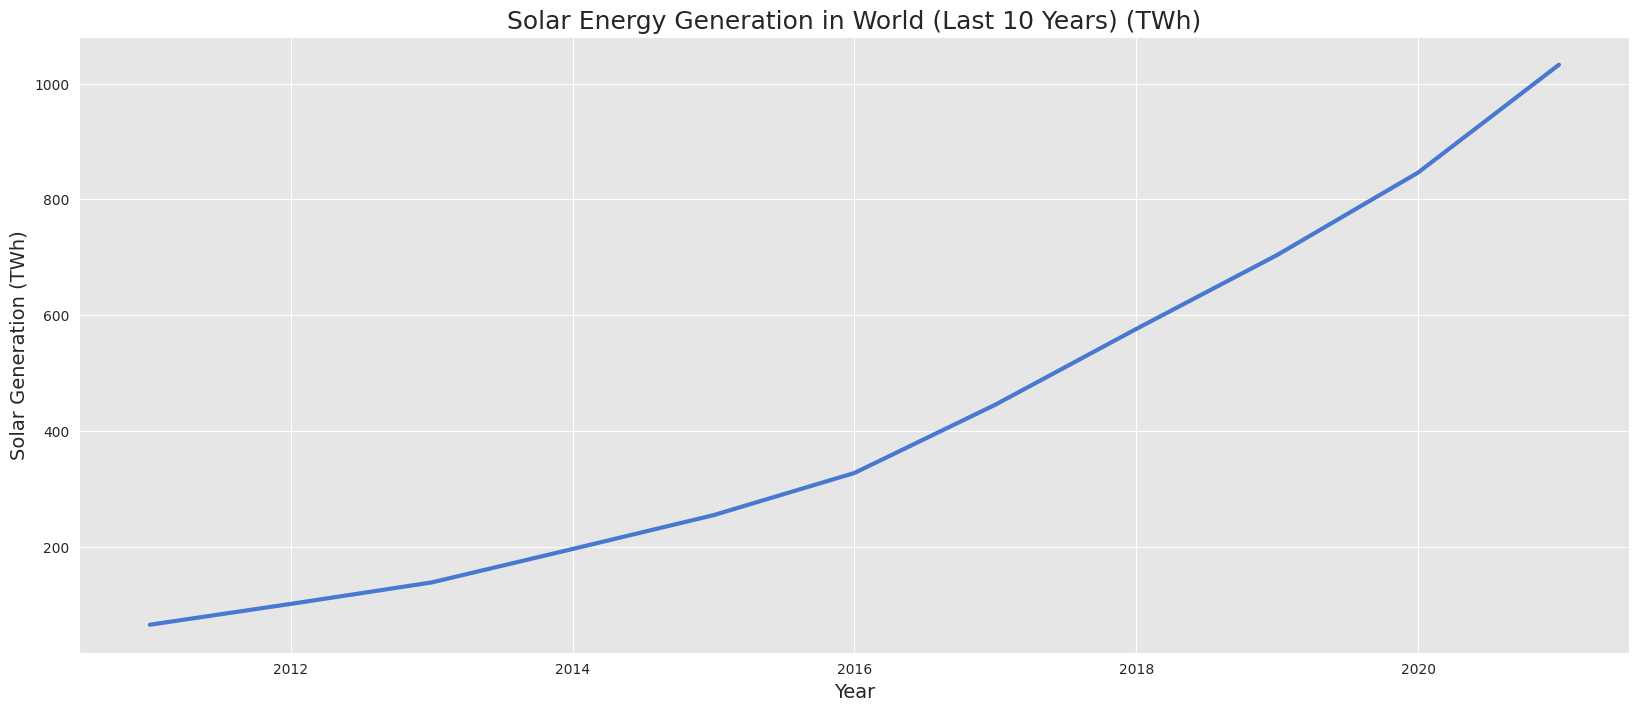

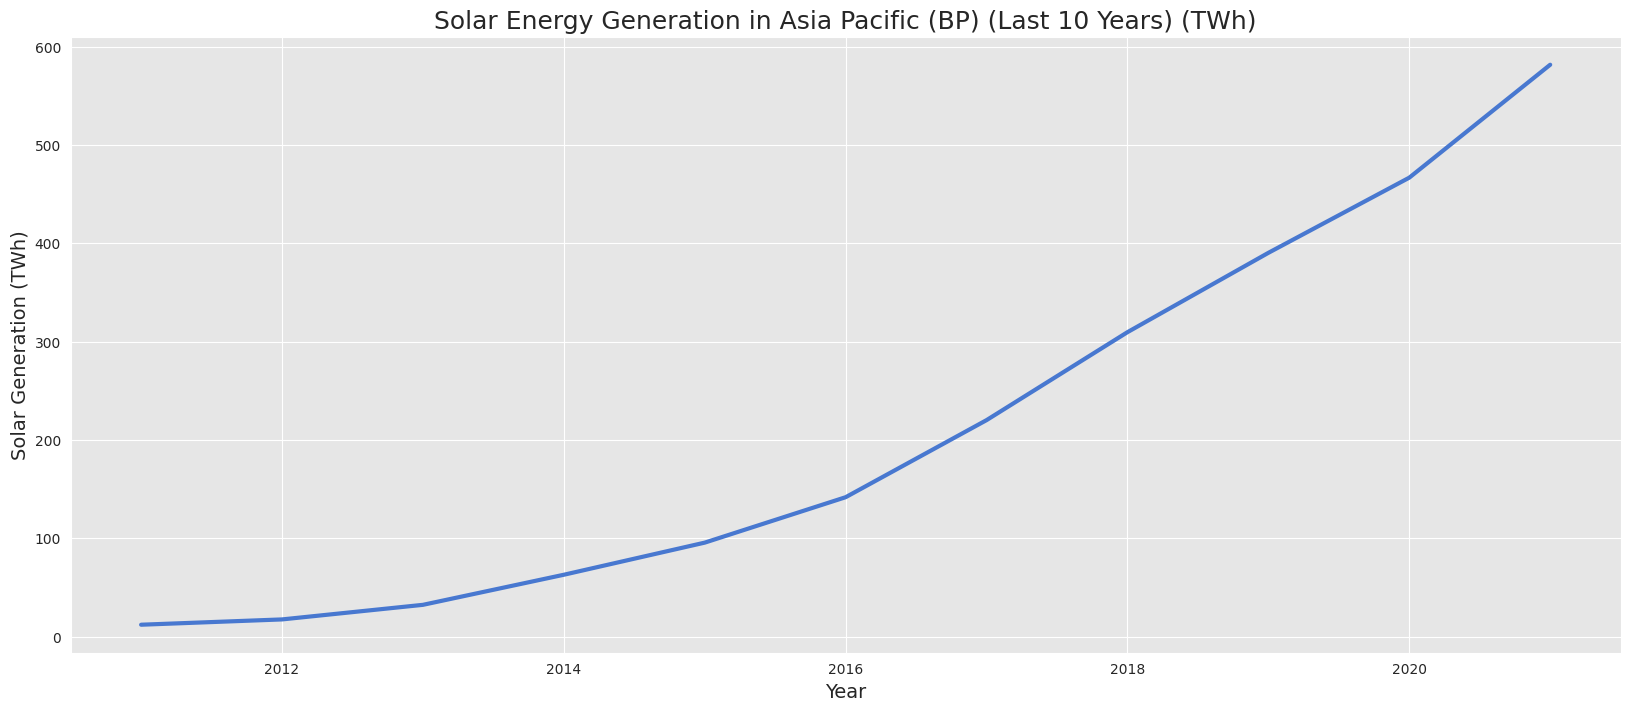

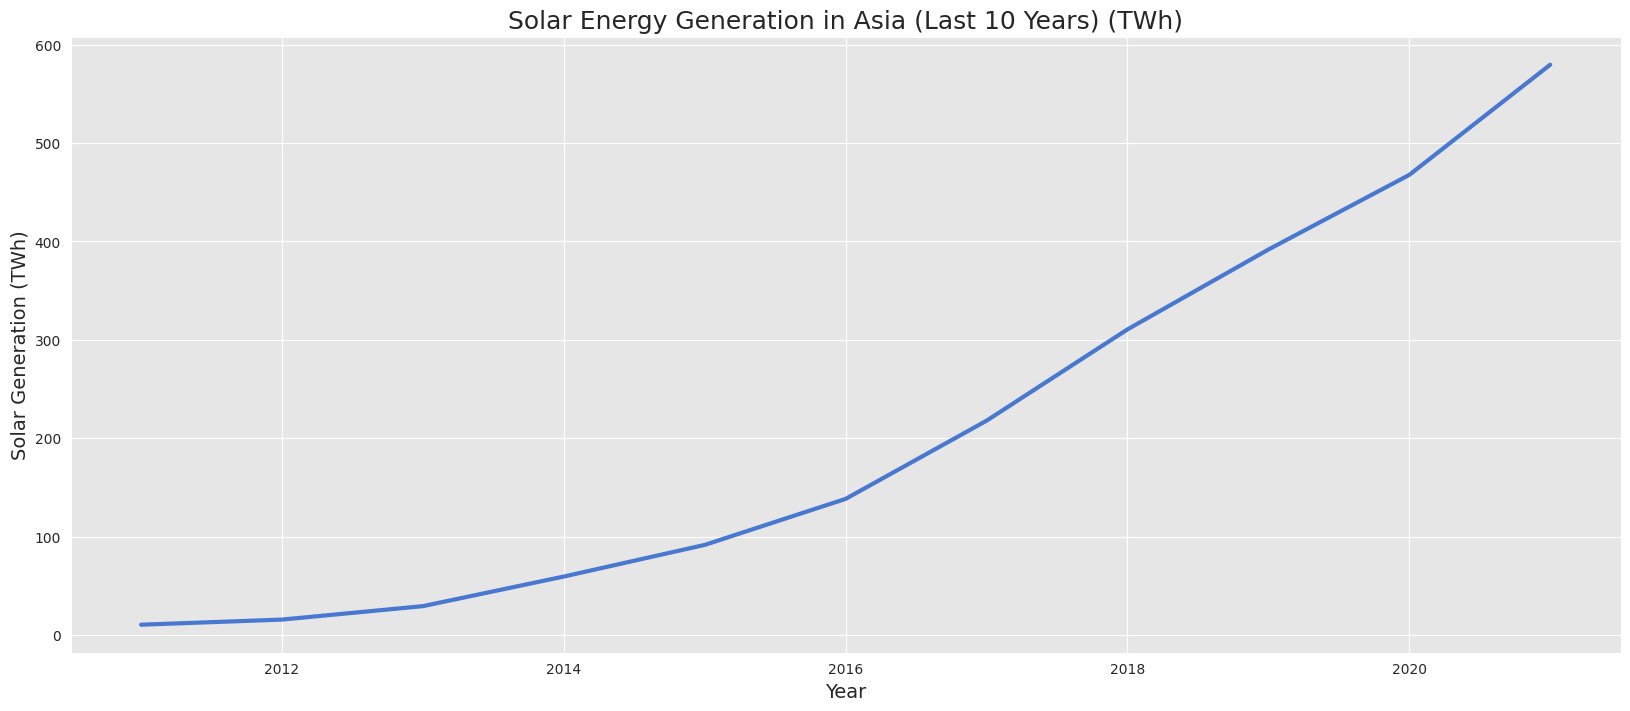

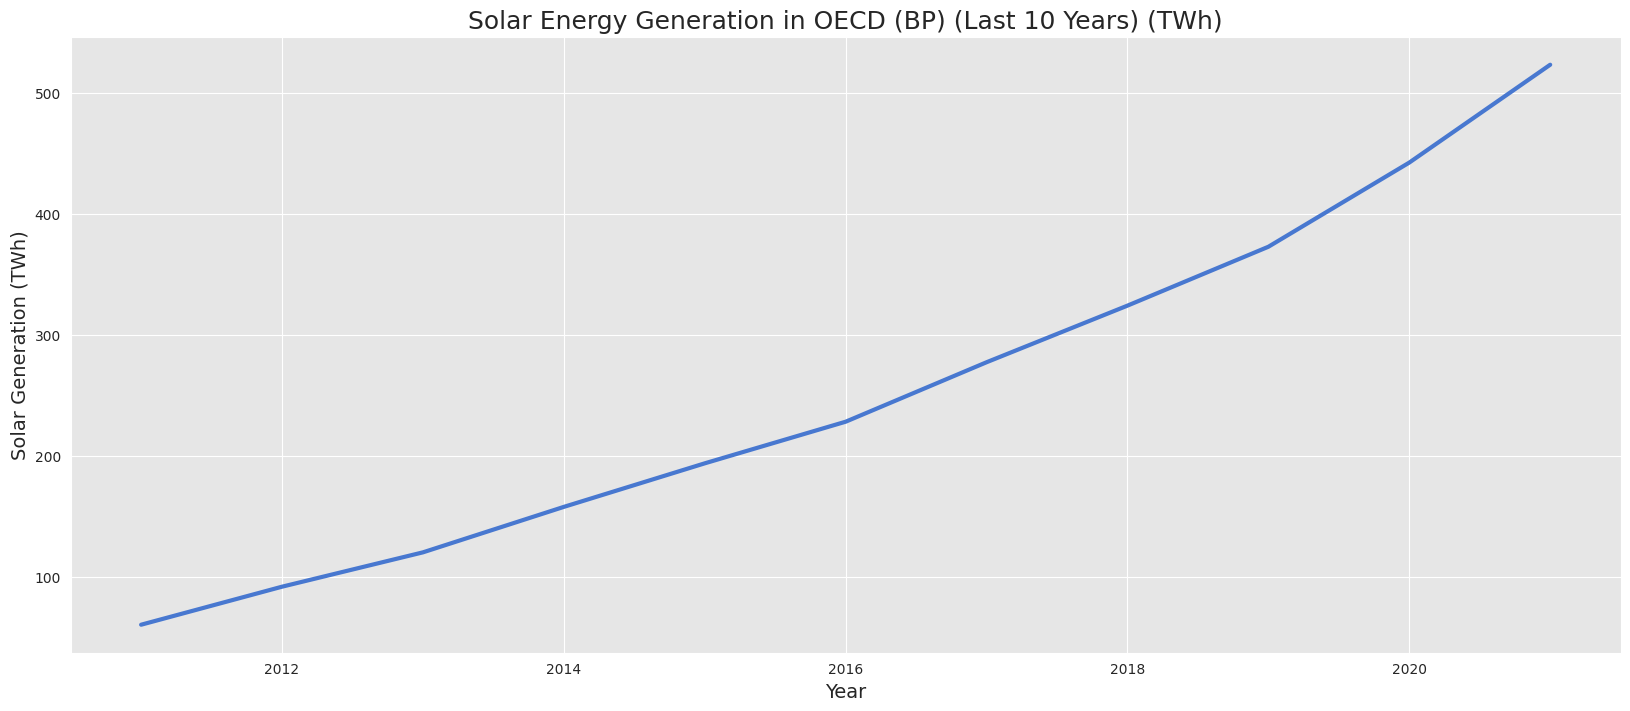

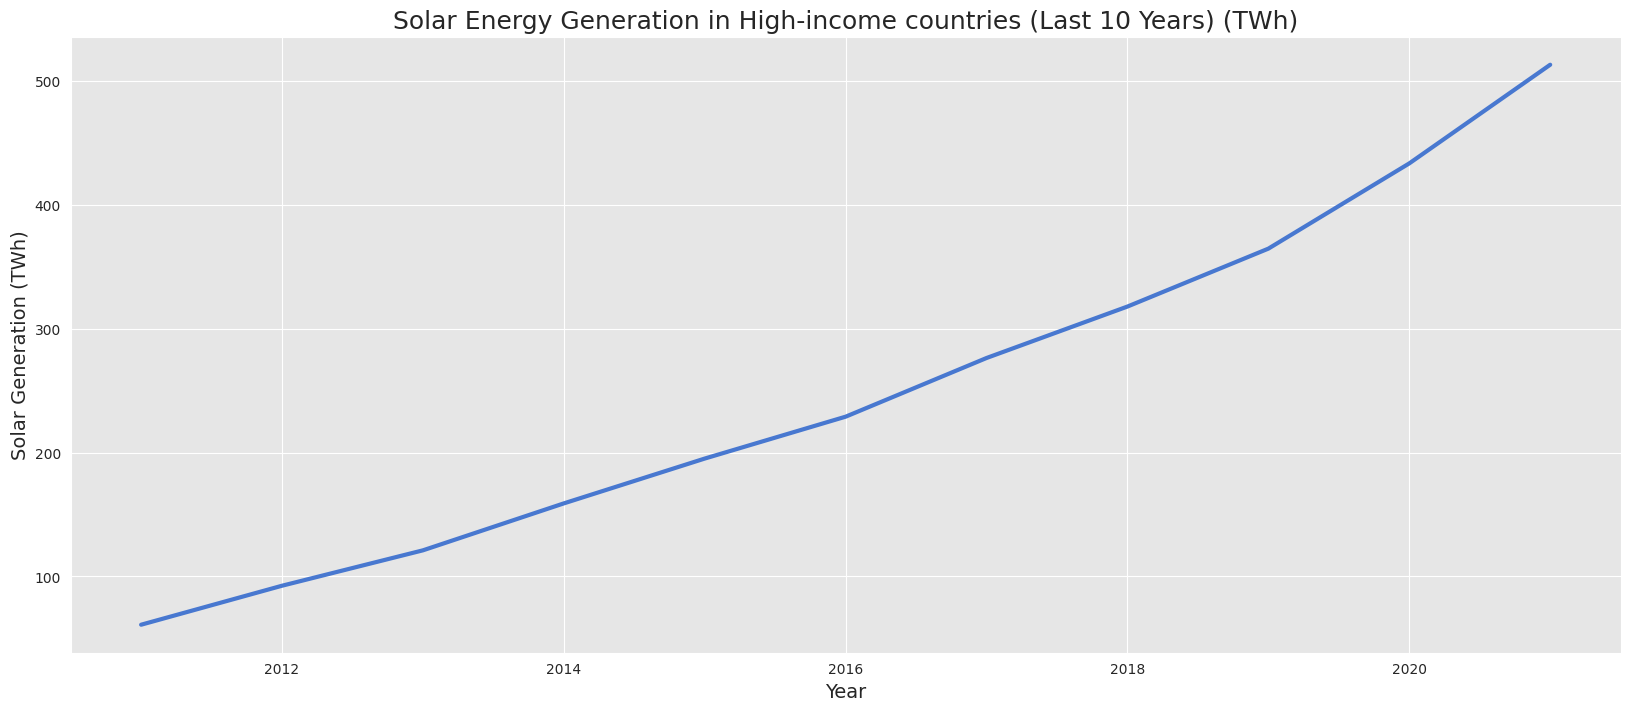

In [24]:
last_10_years_start = 2021 - 10

top_solar_countries_last_10_years = df_2[df_2['Year'] == 2021].nlargest(5, 'Solar Generation - TWh')

for country in top_solar_countries_last_10_years['Entity']:
    country_data_last_10_years = df_2[(df_2['Entity'] == country) & (df_2['Year'] >= last_10_years_start)]
    plt.figure(figsize=(20, 8))
    plt.plot(country_data_last_10_years['Year'], country_data_last_10_years['Solar Generation - TWh'], linewidth=3)
    plt.title(f'Solar Energy Generation in {country} (Last 10 Years) (TWh)', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Solar Generation (TWh)', fontsize=14)
    plt.grid(True)
    plt.show()

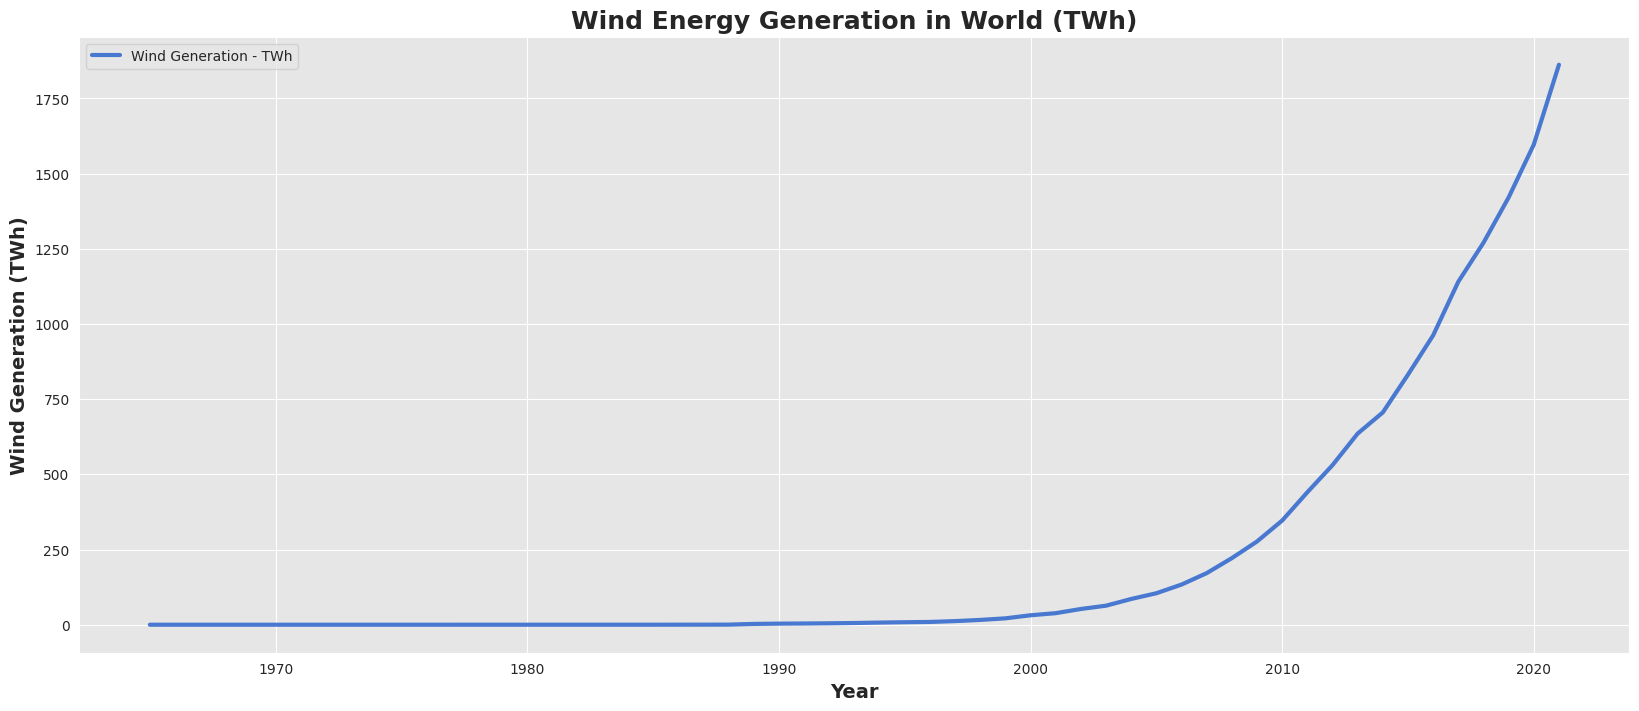

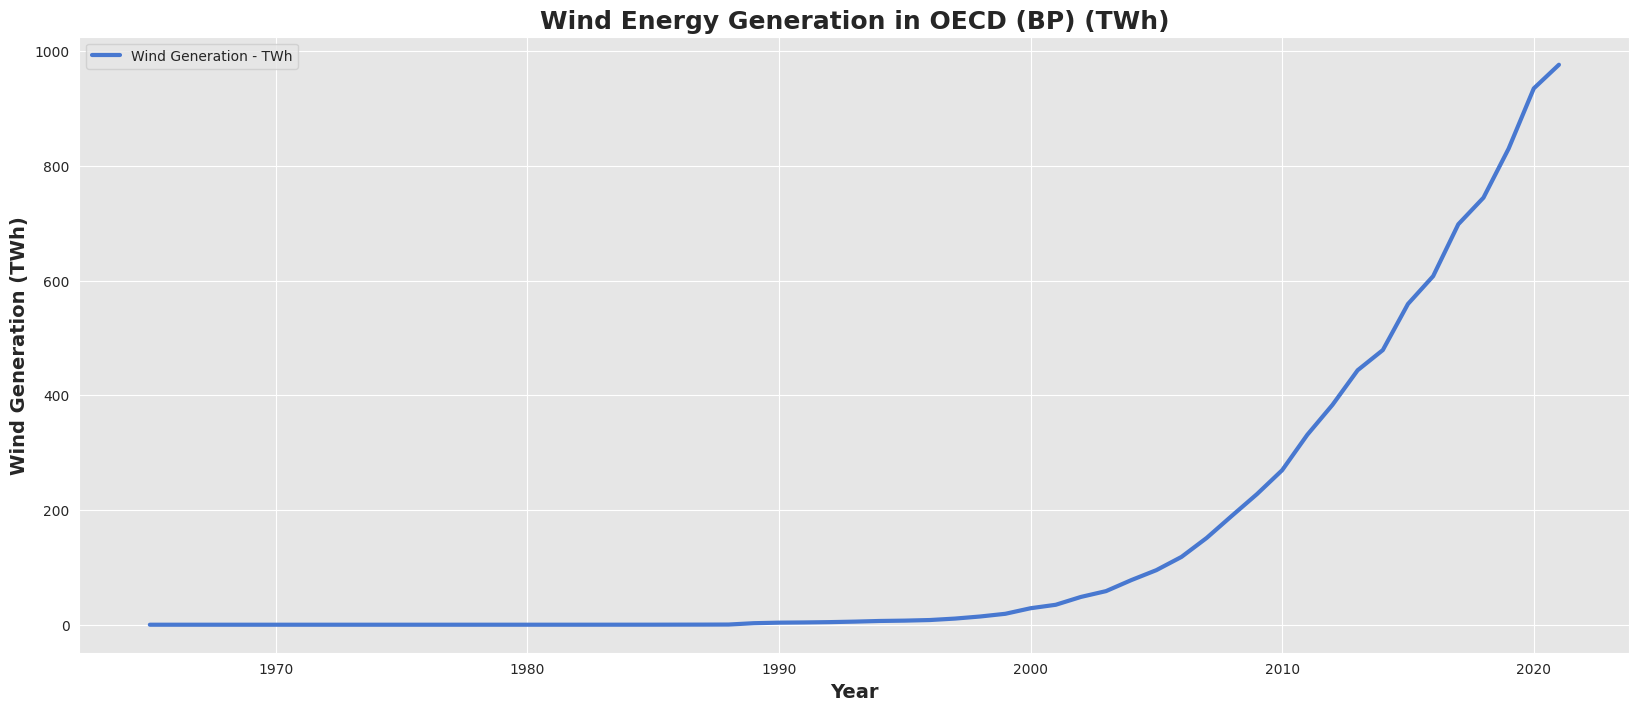

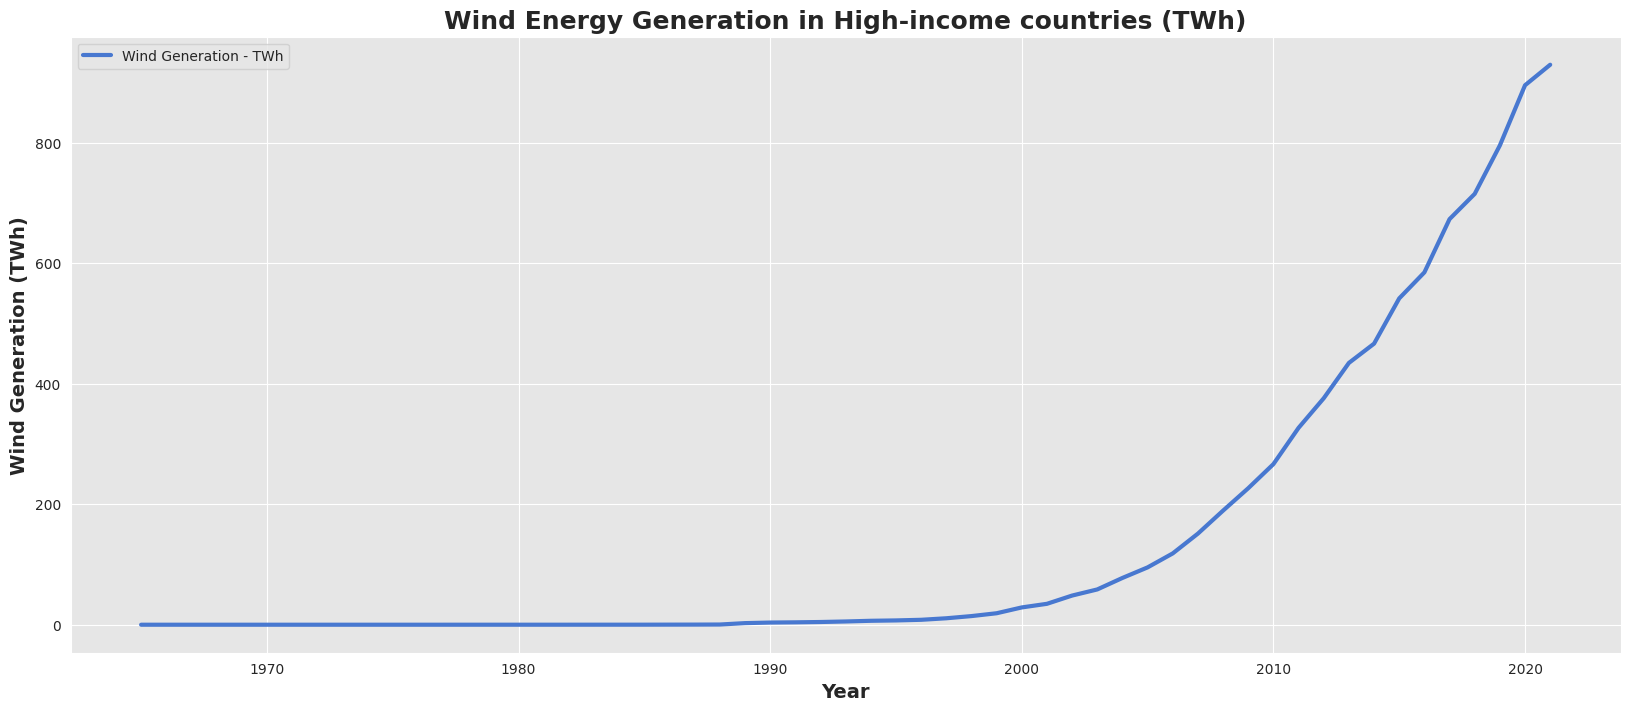

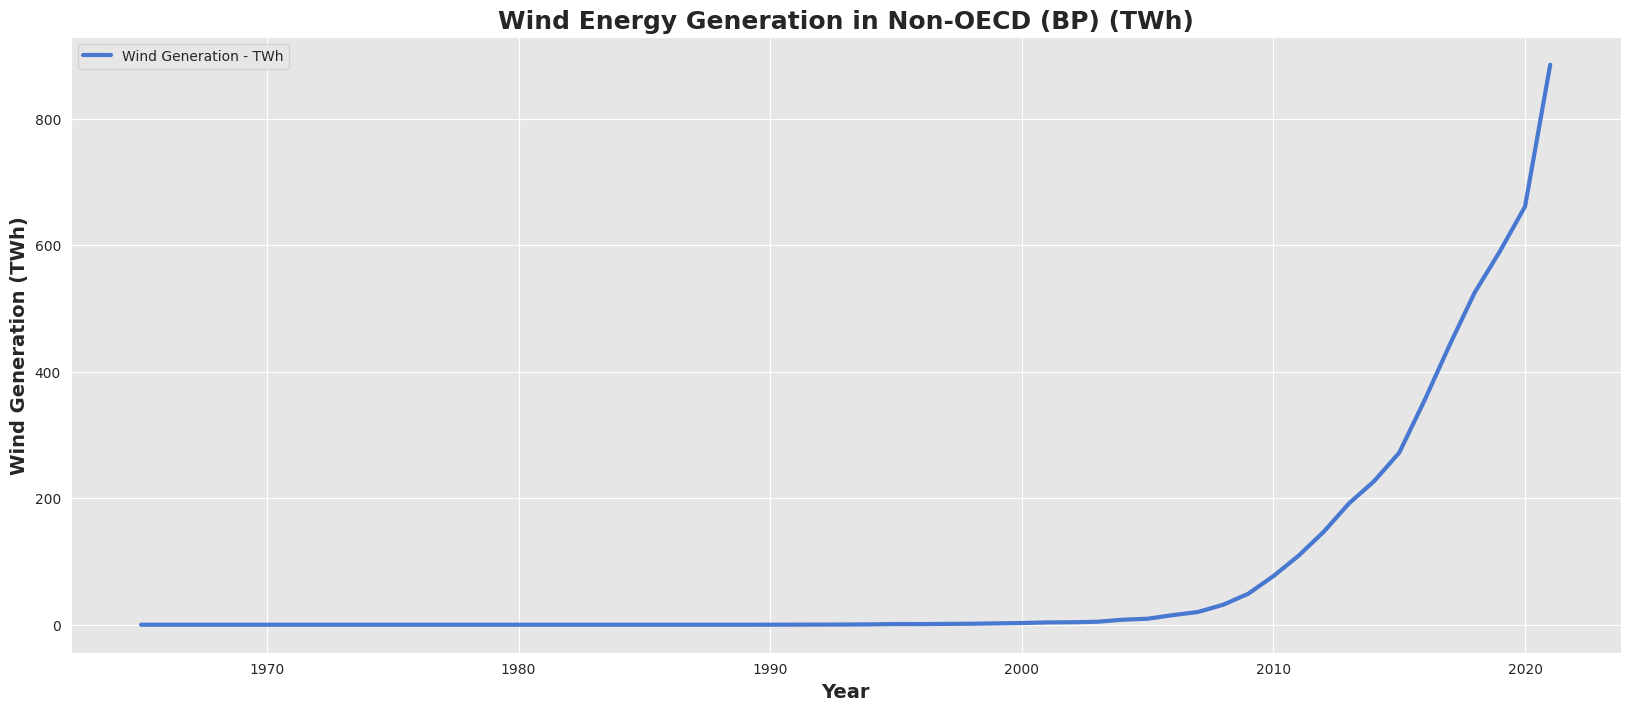

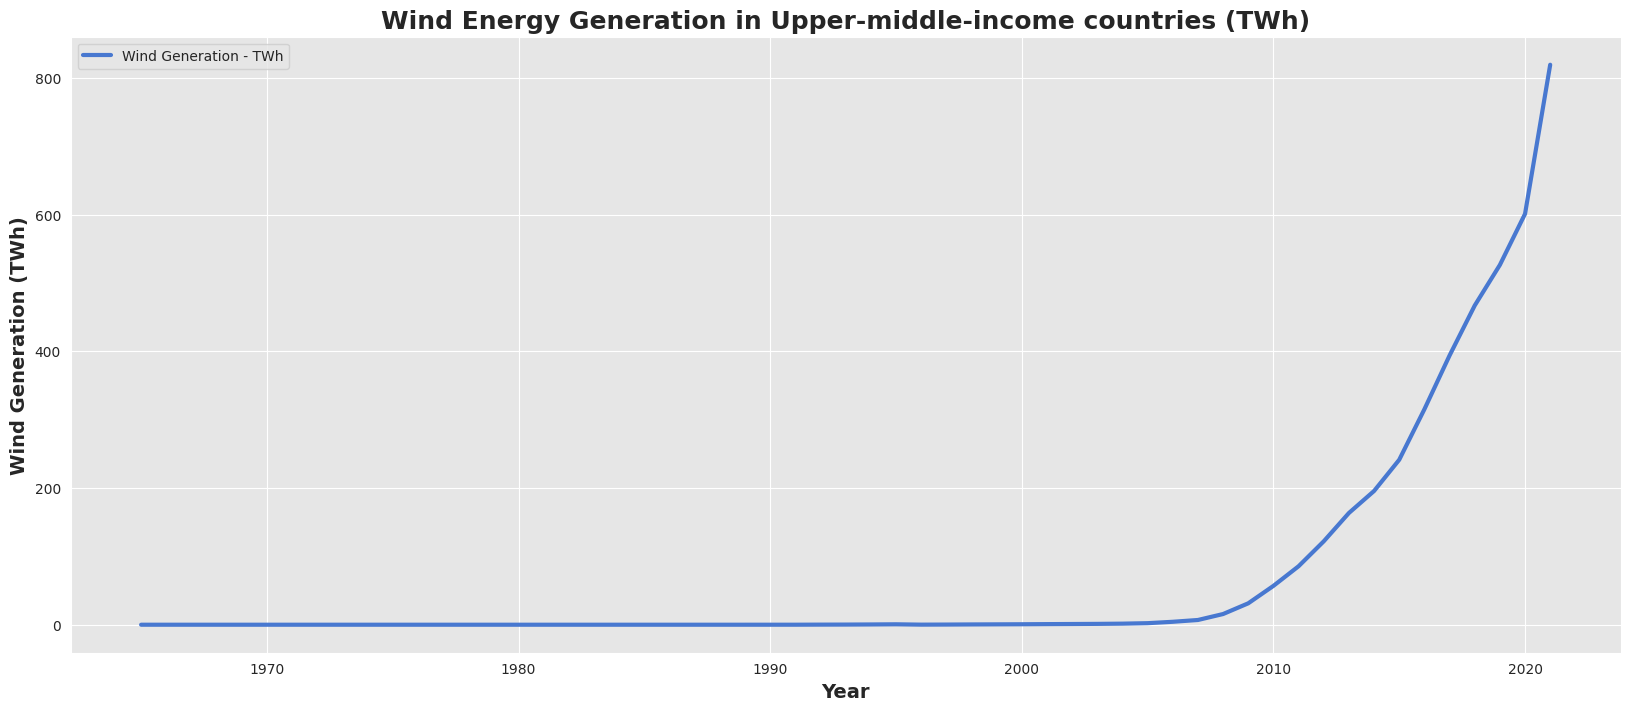

In [25]:
top_wind_countries = df_2[df_2['Year'] == 2021].nlargest(5, 'Wind Generation - TWh')

for country in top_wind_countries['Entity']:
    country_data = df_2[df_2['Entity'] == country]
    ax = country_data.plot(x='Year', y='Wind Generation - TWh', figsize=(20, 8), linewidth=3)
    ax.set_title(f'Wind Energy Generation in {country} (TWh)', fontsize=18, fontweight='bold')
    ax.set_xlabel('Year', fontsize=14, fontweight='bold')
    ax.set_ylabel('Wind Generation (TWh)', fontsize=14, fontweight='bold')
    plt.show()

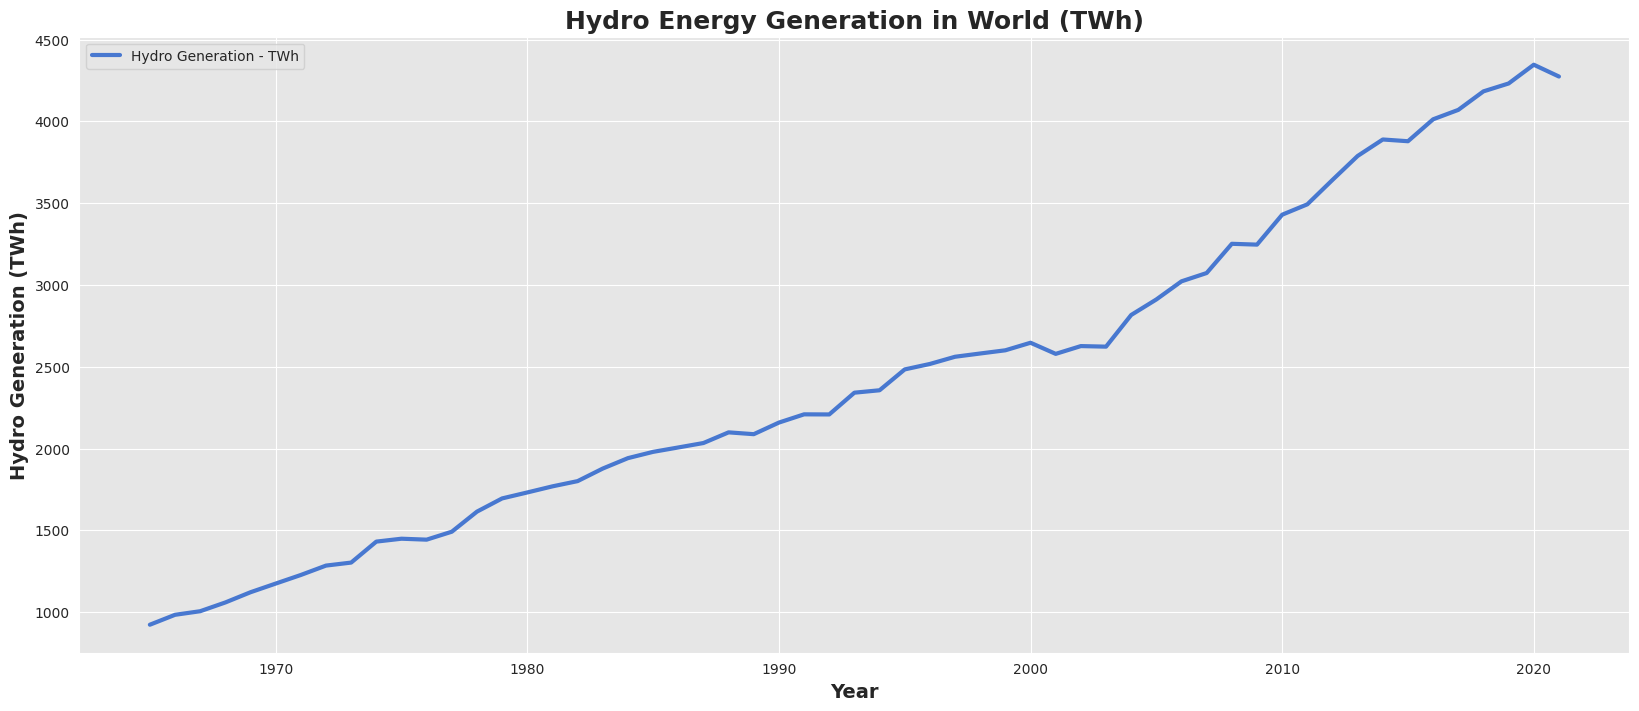

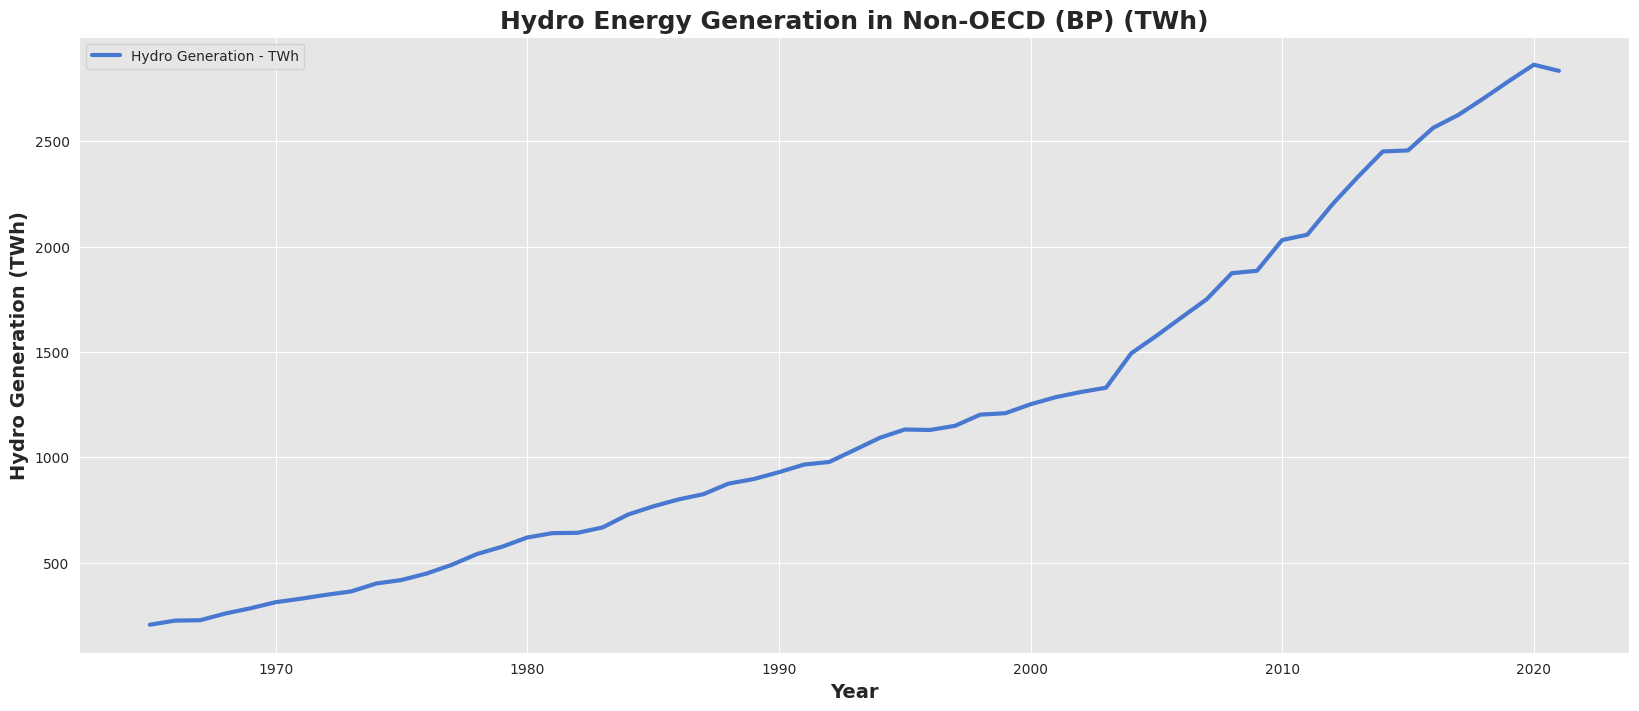

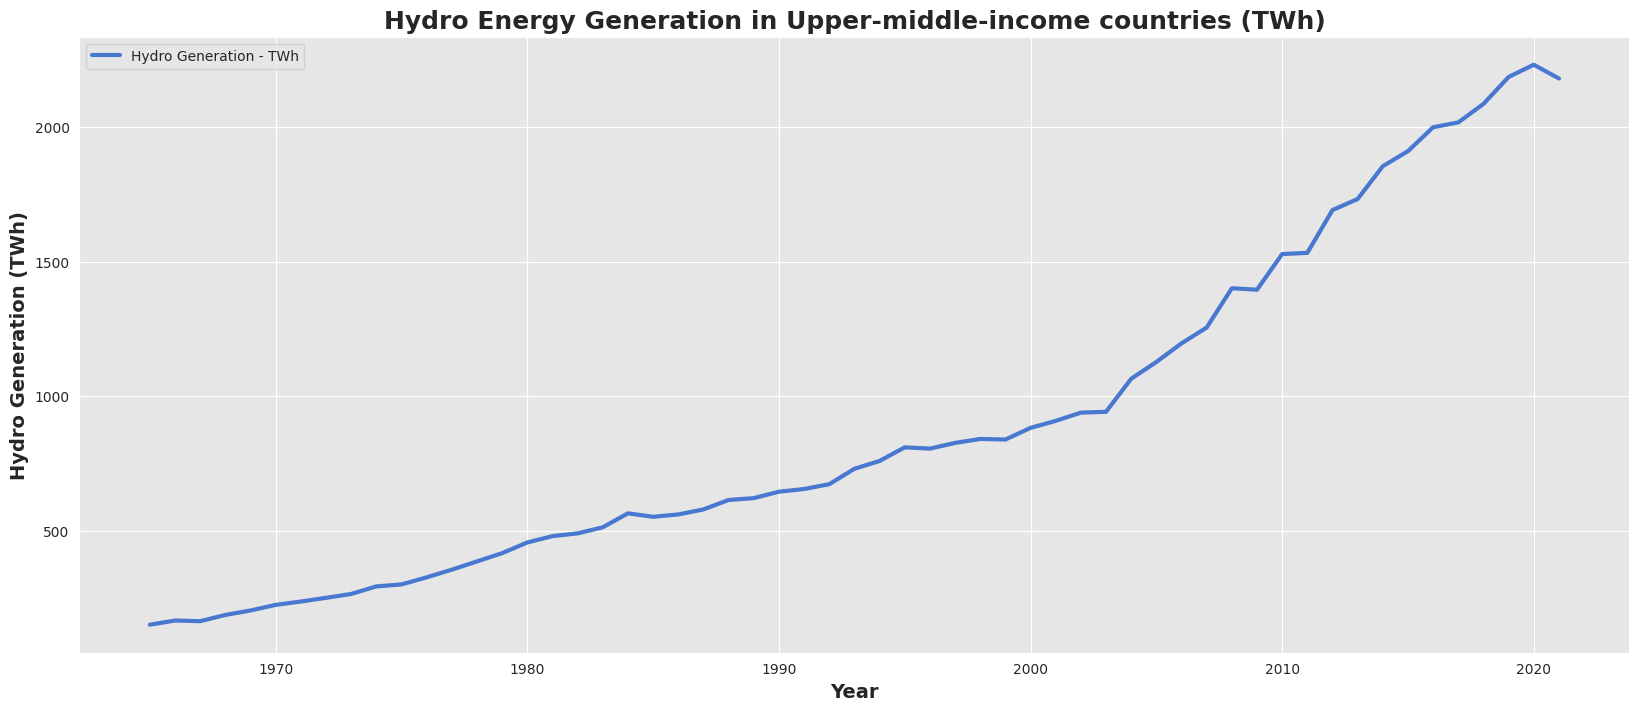

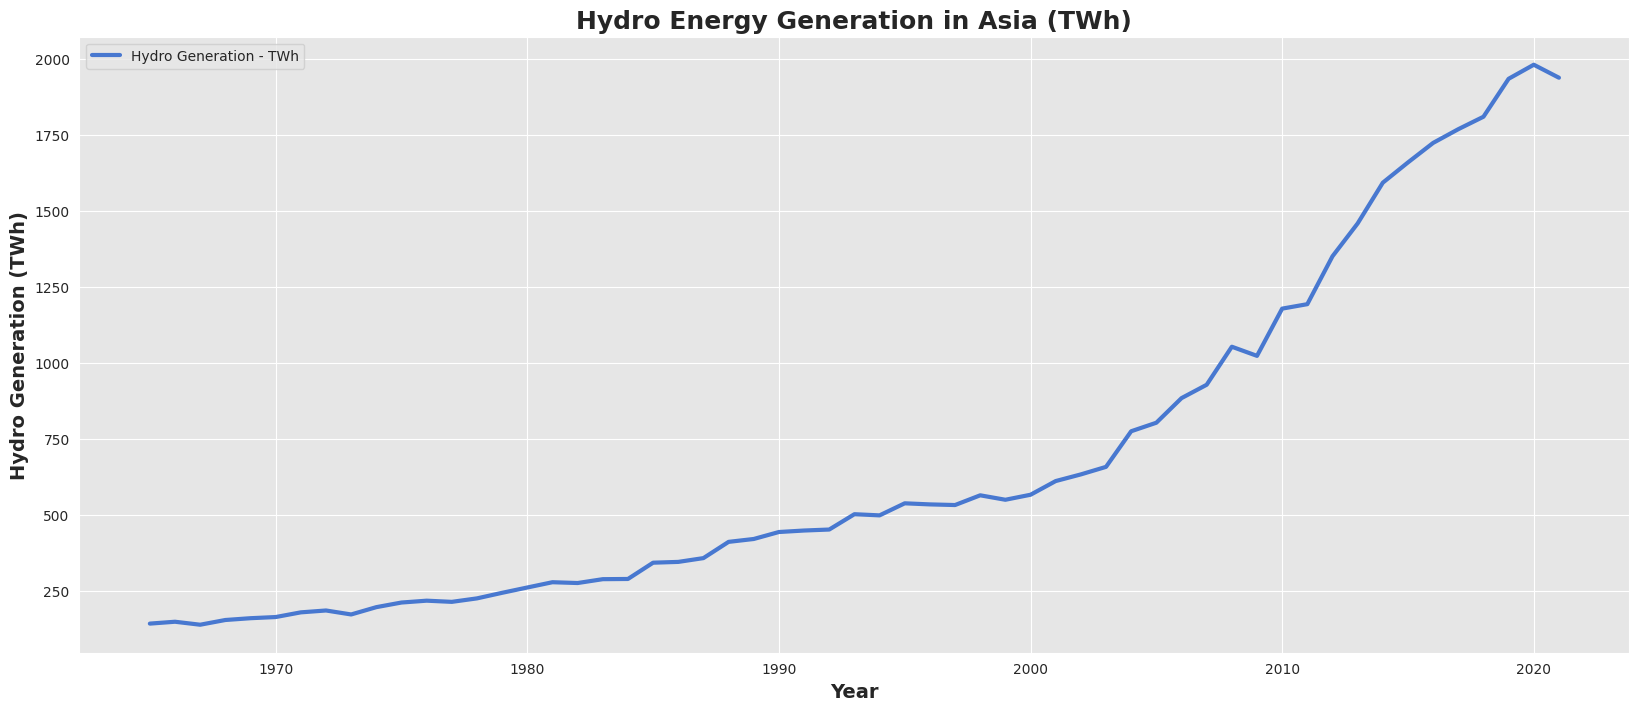

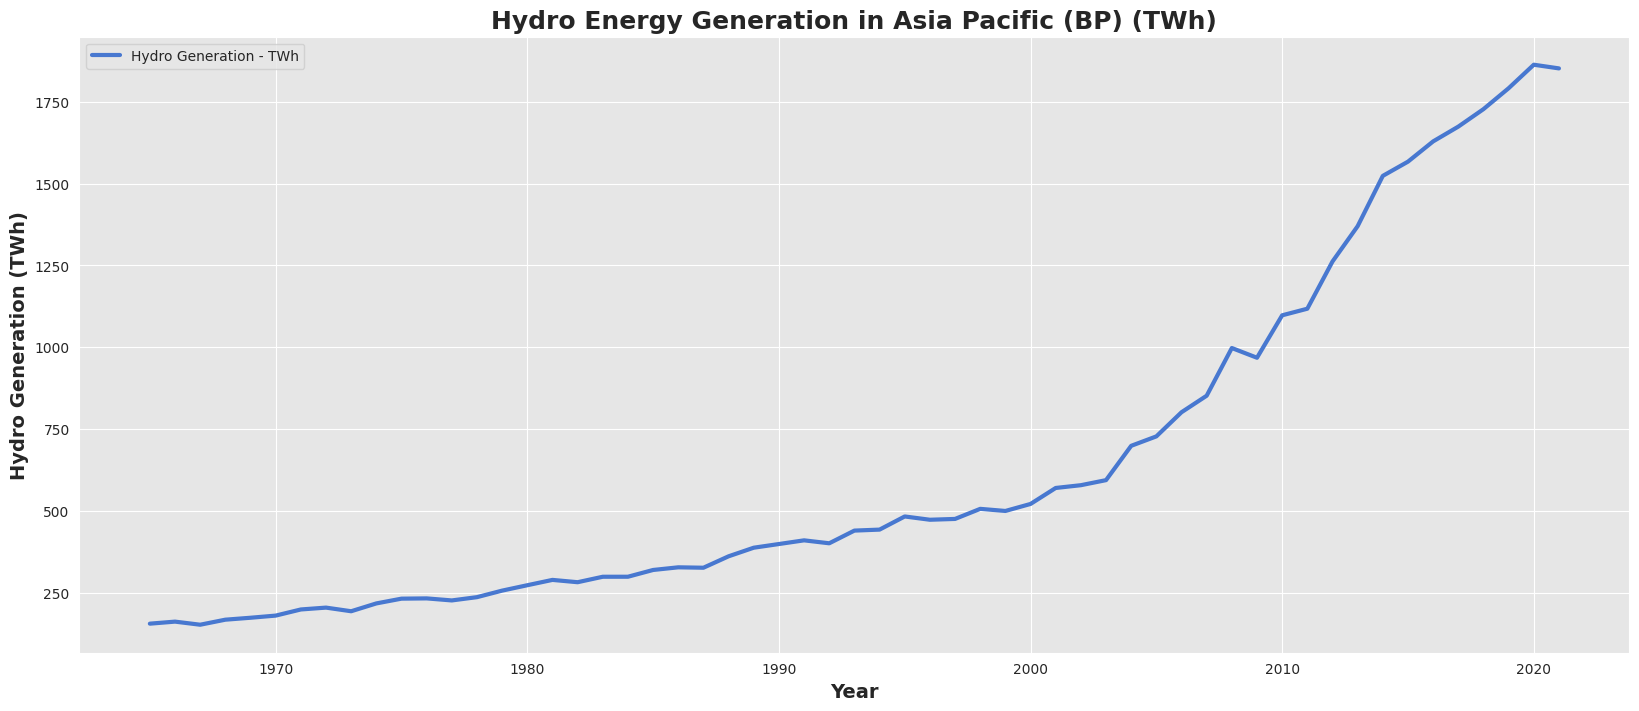

In [26]:
top_hydro_countries = df_2[df_2['Year'] == 2021].nlargest(5, 'Hydro Generation - TWh')

for country in top_hydro_countries['Entity']:
    country_data = df_2[df_2['Entity'] == country]
    ax = country_data.plot(x='Year', y='Hydro Generation - TWh', figsize=(20, 8), linewidth=3)
    ax.set_title(f'Hydro Energy Generation in {country} (TWh)', fontsize=18, fontweight='bold')
    ax.set_xlabel('Year', fontsize=14, fontweight='bold')
    ax.set_ylabel('Hydro Generation (TWh)', fontsize=14, fontweight='bold')
    plt.show()


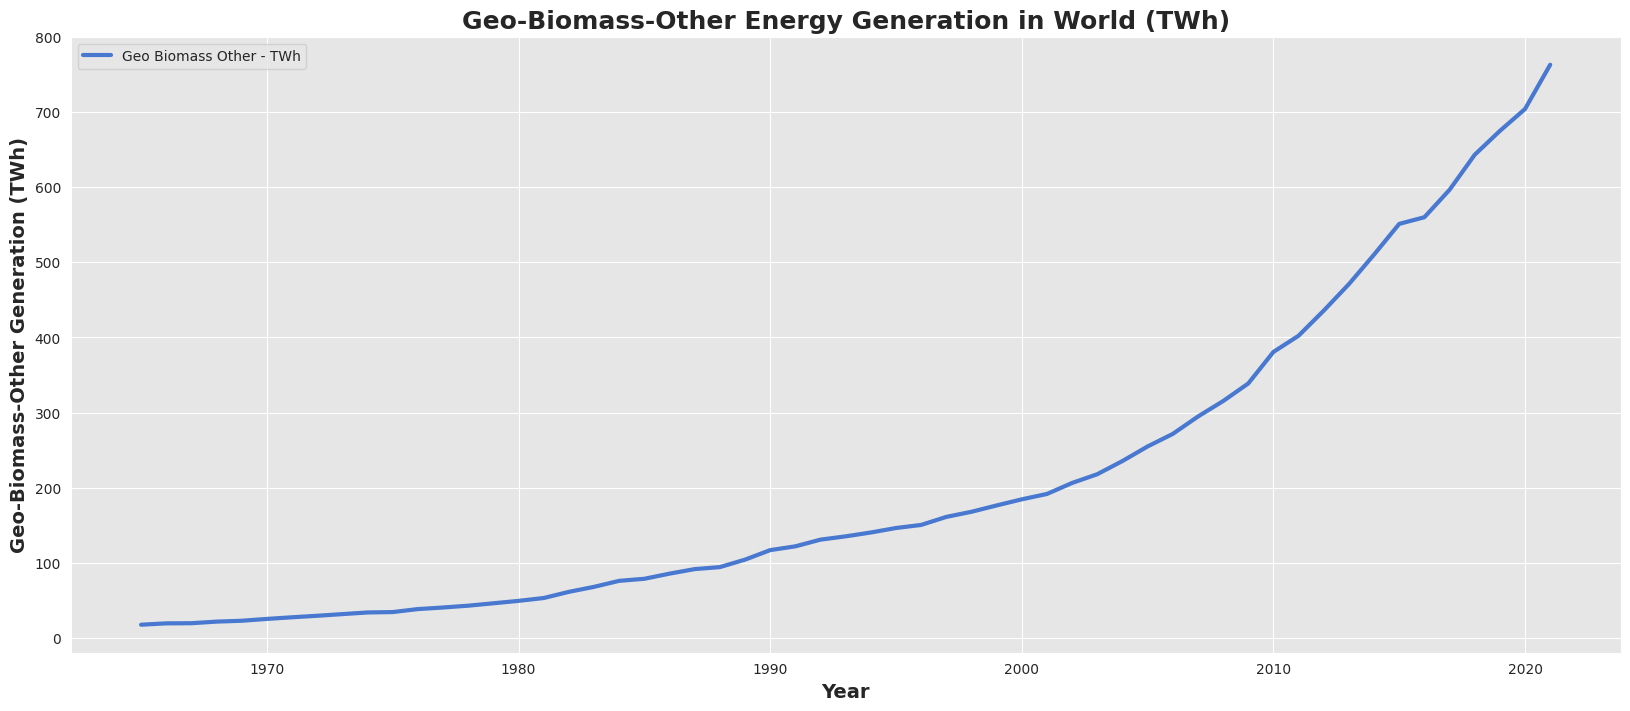

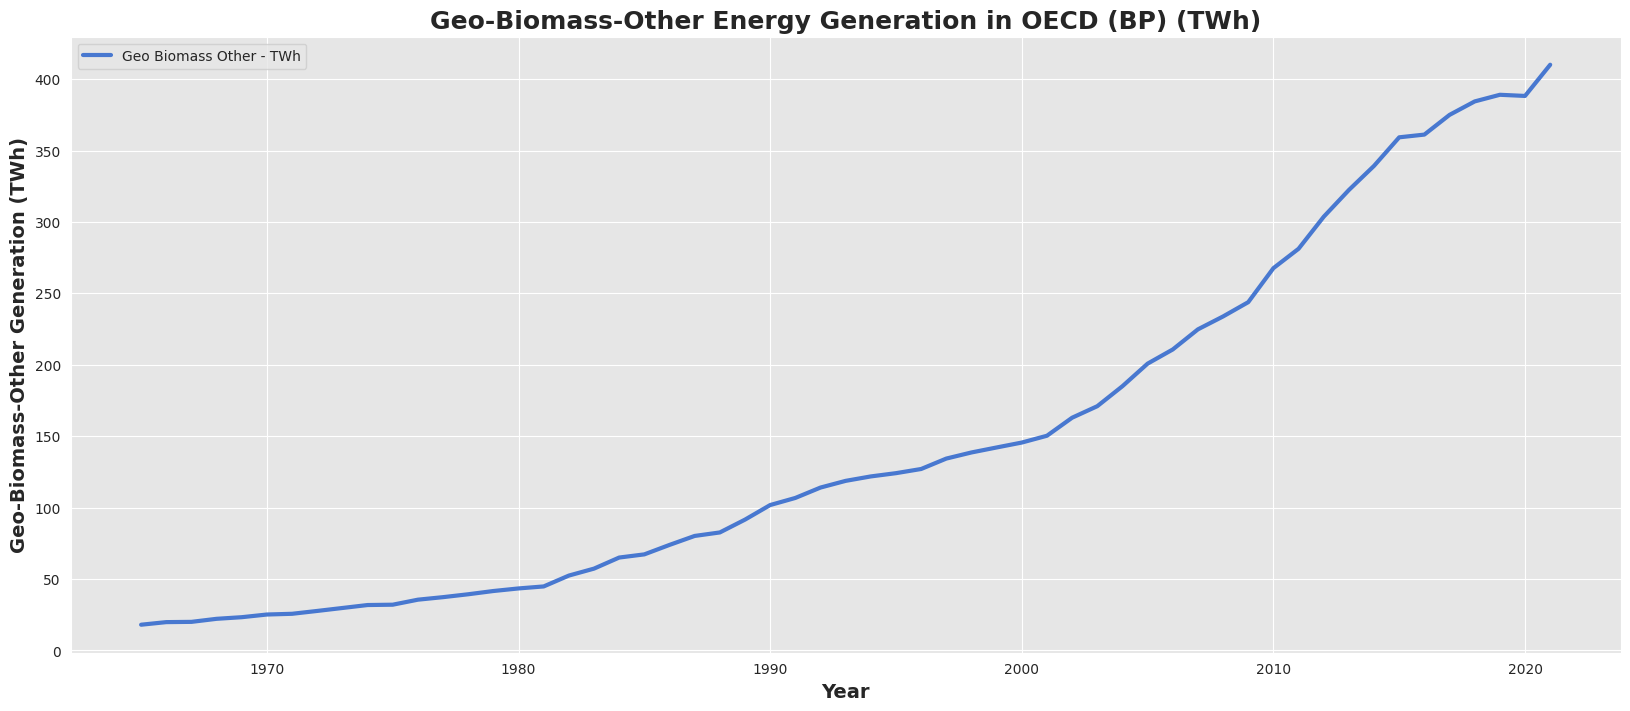

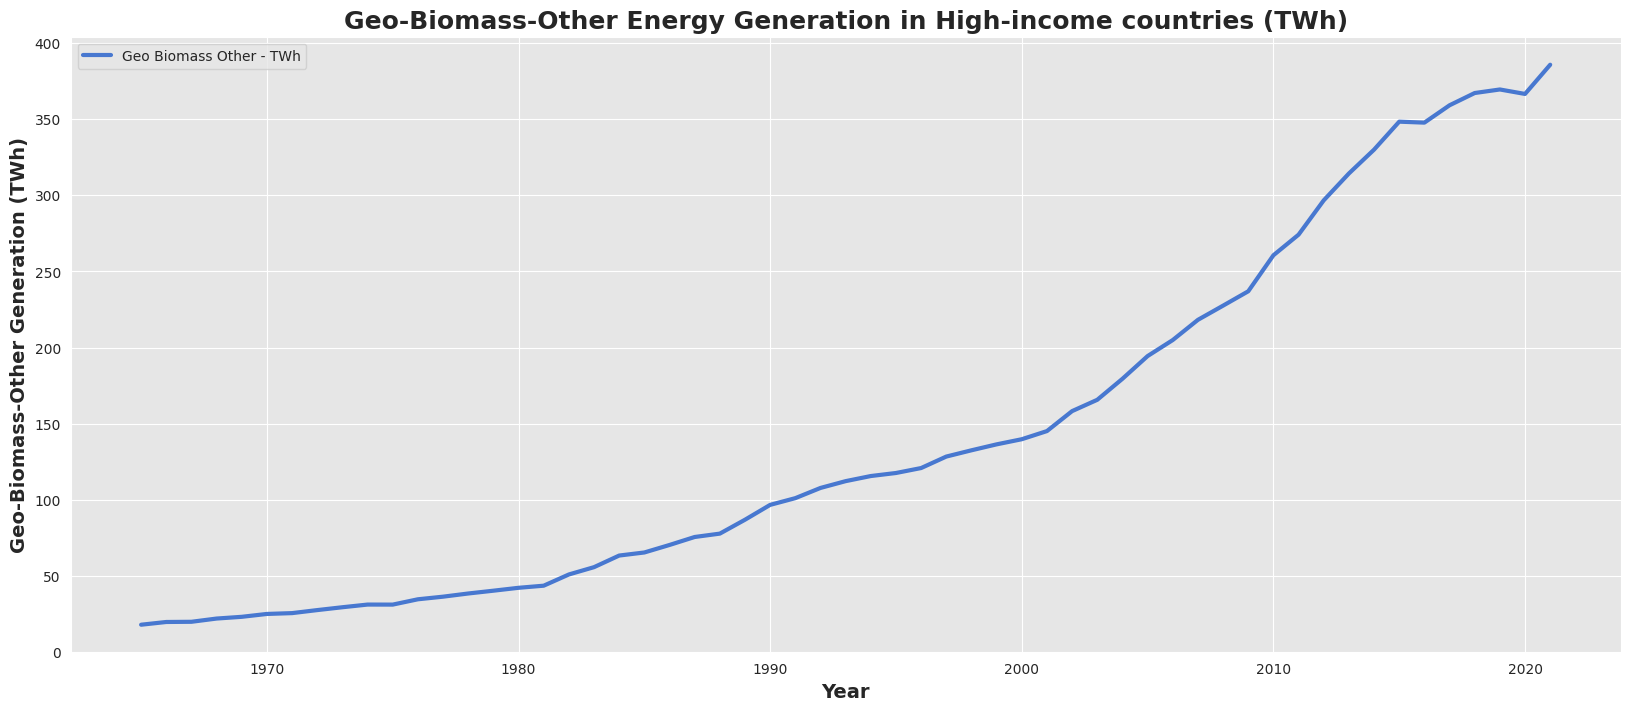

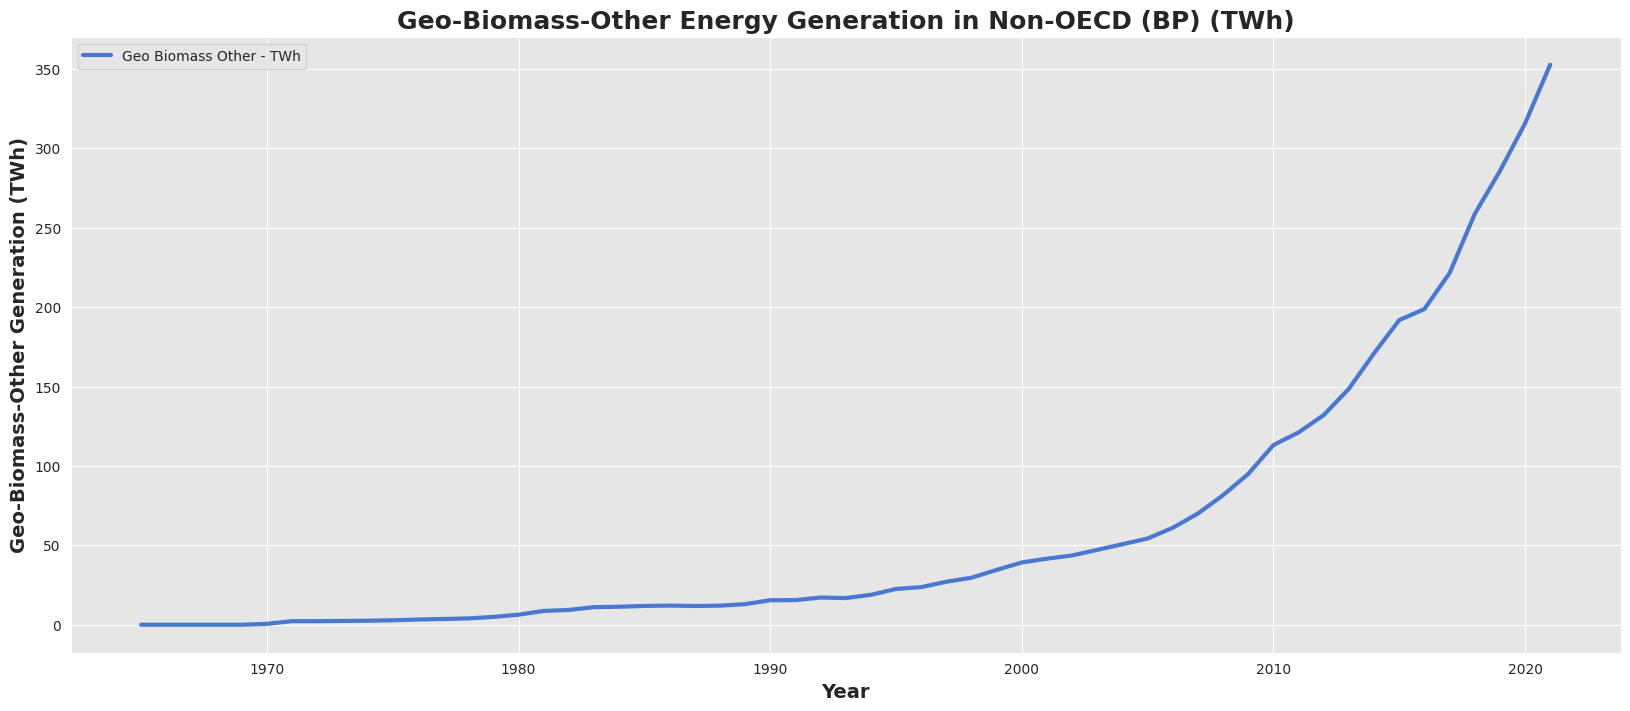

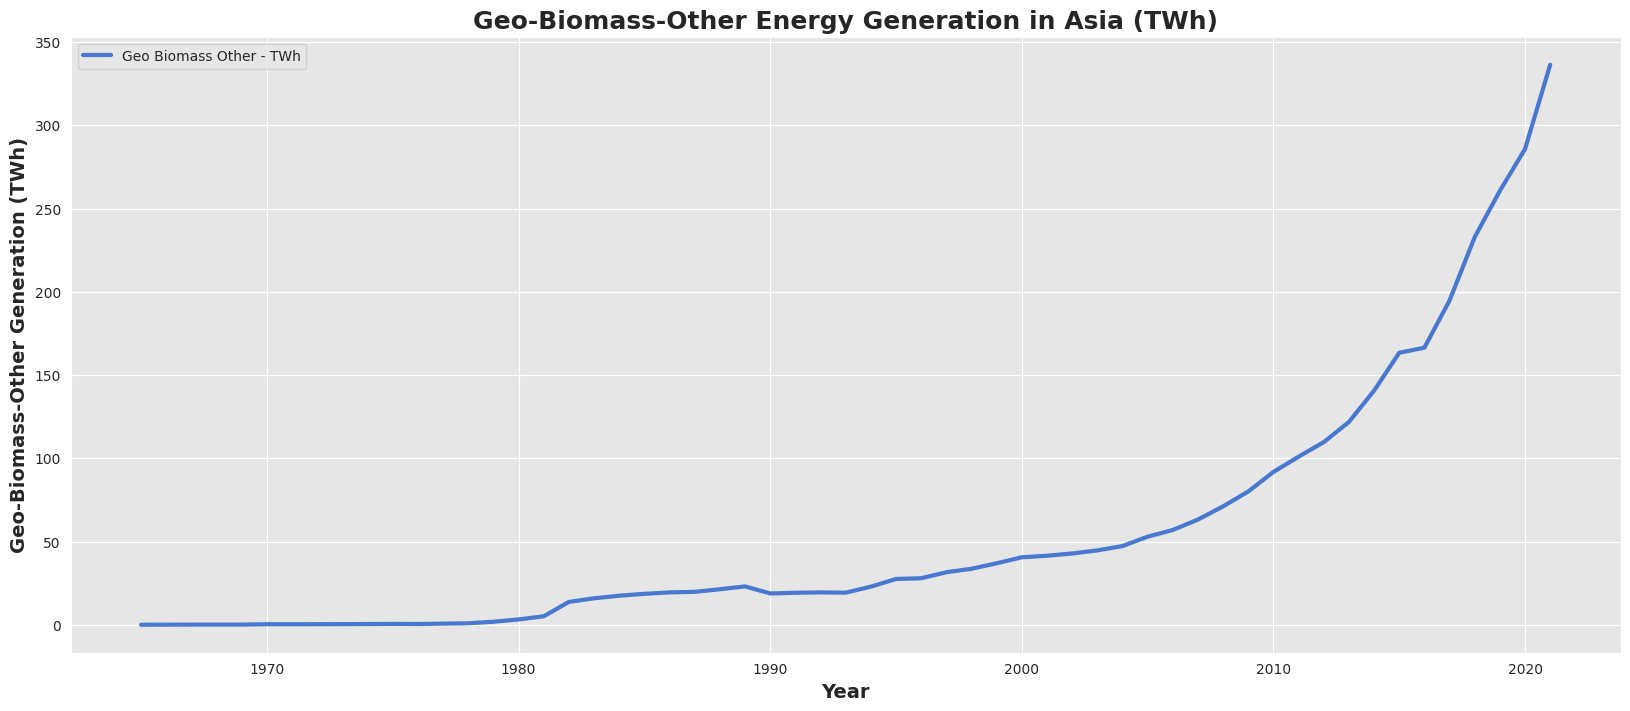

In [27]:
top_geo_biomass_other_countries = df_2[df_2['Year'] == 2021].nlargest(5, 'Geo Biomass Other - TWh')

for country in top_geo_biomass_other_countries['Entity']:
    country_data = df_2[df_2['Entity'] == country]
    ax = country_data.plot(x='Year', y='Geo Biomass Other - TWh', figsize=(20, 8), linewidth=3)
    ax.set_title(f'Geo-Biomass-Other Energy Generation in {country} (TWh)', fontsize=18, fontweight='bold')
    ax.set_xlabel('Year', fontsize=14, fontweight='bold')
    ax.set_ylabel('Geo-Biomass-Other Generation (TWh)', fontsize=14, fontweight='bold')
    plt.show()

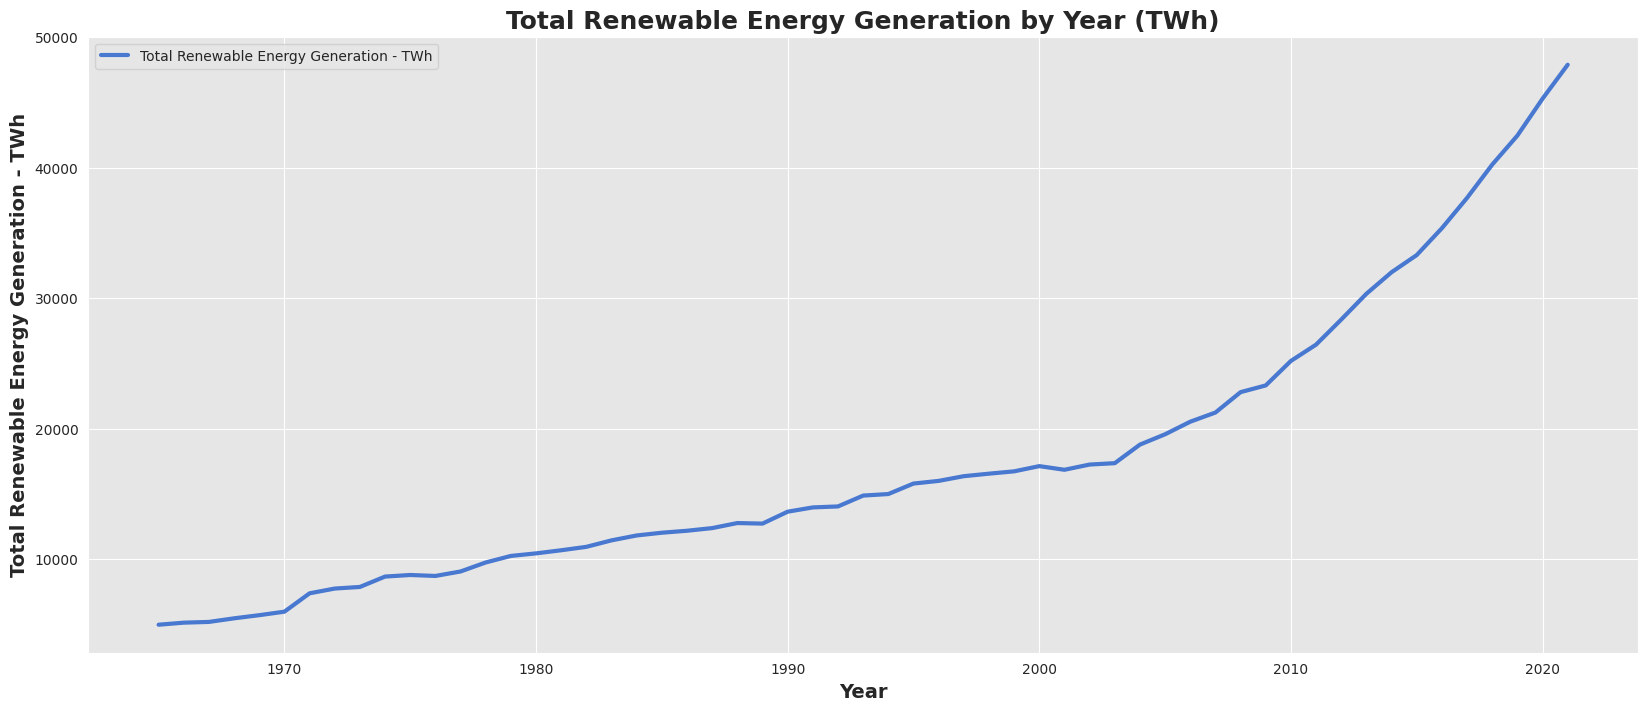

In [28]:
total_energy_by_year = df_2.groupby('Year').sum(numeric_only=True)

ax = total_energy_by_year.plot(y='Total Renewable Energy Generation - TWh', figsize=(20, 8), linewidth=3, title='Total Renewable Energy Generation by Year (TWh)')
ax.set_title('Total Renewable Energy Generation by Year (TWh)', fontsize=18, fontweight='bold')
ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Total Renewable Energy Generation - TWh', fontsize=14, fontweight='bold')
plt.show()


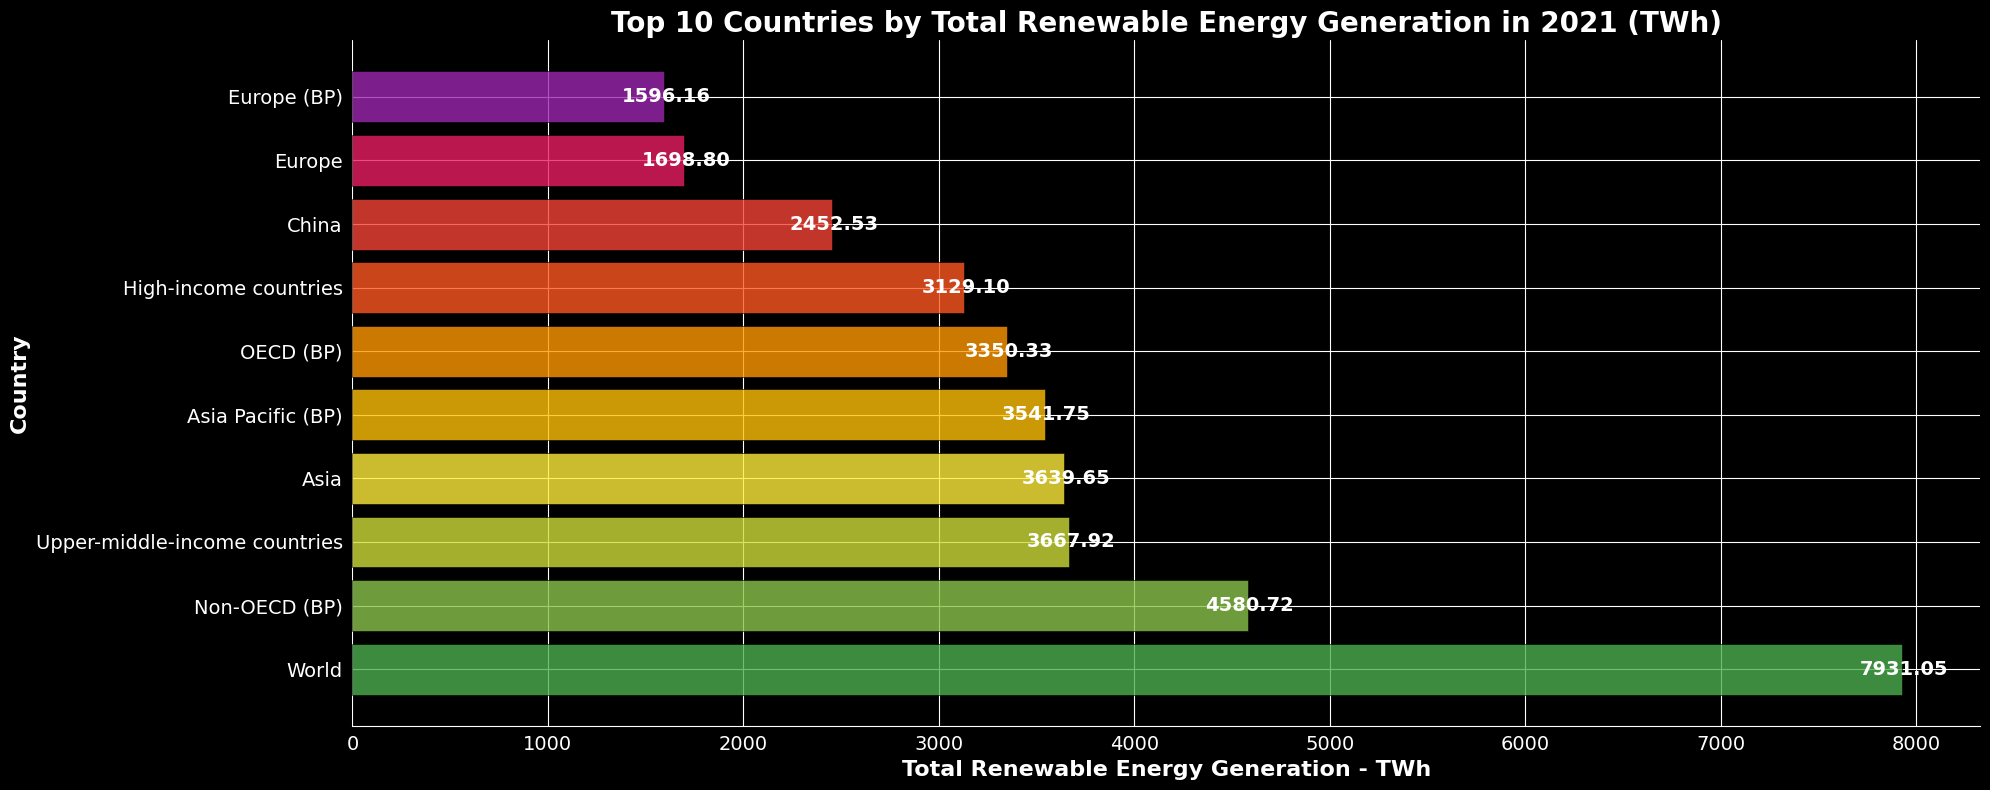

In [29]:
df_2['Total Renewable Energy Generation - TWh'] = df_2['Geo Biomass Other - TWh'] + df_2['Solar Generation - TWh'] + df_2['Wind Generation - TWh'] + df_2['Hydro Generation - TWh']

top_total_energy_countries_2021 = df_2[df_2['Year'] == 2021].nlargest(10, 'Total Renewable Energy Generation - TWh')

color_list = ['#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107', '#FF9800', '#FF5722', '#F44336', '#E91E63', '#9C27B0']

title_font = {'fontname':'Arial', 'size':'20', 'color':'white', 'weight':'bold'}
axis_font = {'fontname':'Arial', 'size':'16', 'color':'white', 'weight':'bold'}

fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

bars = ax.barh(top_total_energy_countries_2021['Entity'],
               top_total_energy_countries_2021['Total Renewable Energy Generation - TWh'],
               color=color_list, edgecolor='black')

for bar in bars:
    bar.set_edgecolor("black")
    bar.set_linewidth(0.5)
    bar.set_alpha(0.8)

for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.2f}',
                xy=(width + 10, bar.get_y() + bar.get_height() / 2),
                ha='center', va='center',
                color='white', fontsize=14, fontweight='bold')

ax.set_title('Top 10 Countries by Total Renewable Energy Generation in 2021 (TWh)', **title_font)
ax.set_xlabel('Total Renewable Energy Generation - TWh', **axis_font)
ax.set_ylabel('Country', **axis_font)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('white')

plt.tight_layout()
plt.show()

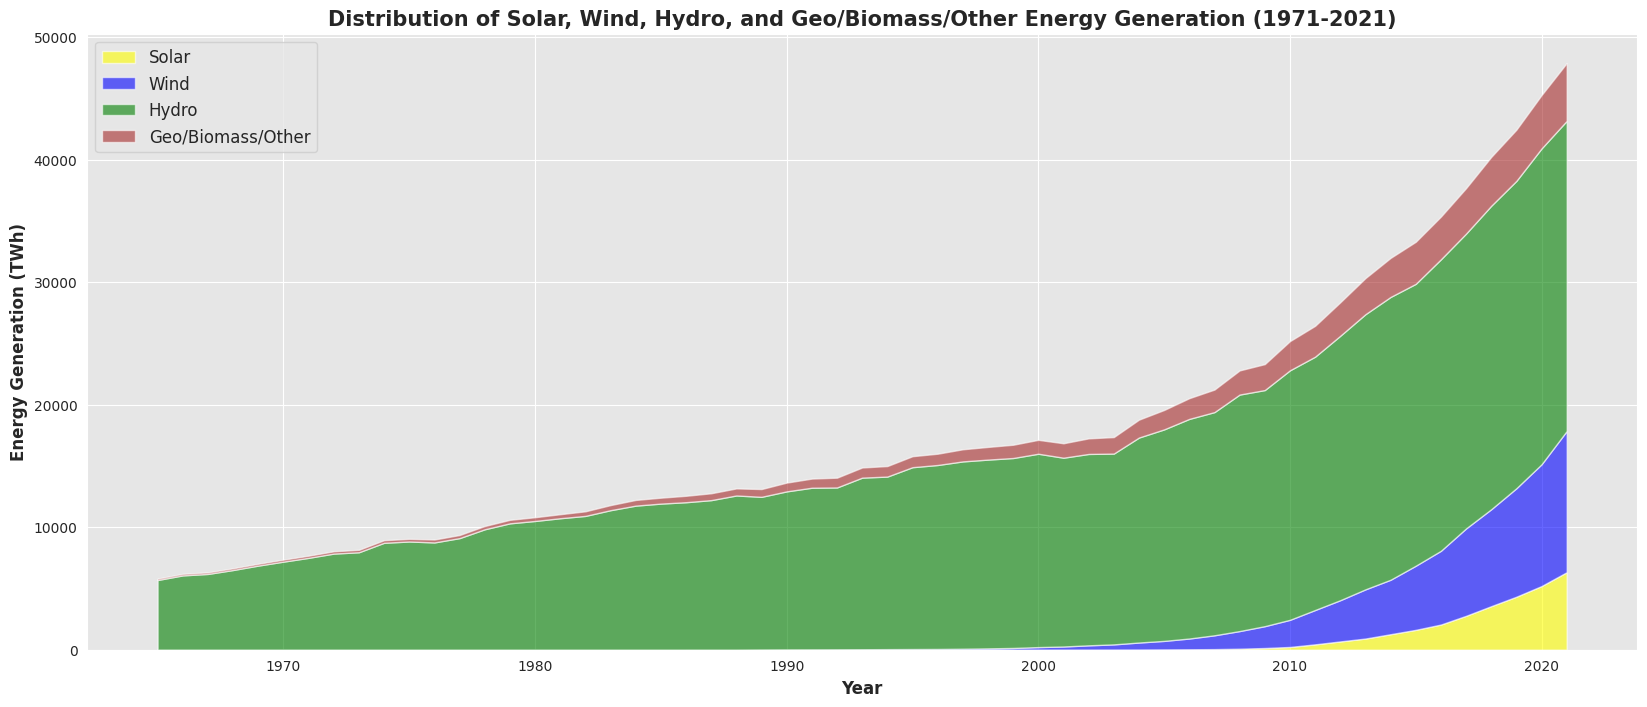

In [30]:
solar_wind_hydro_geo_biomass_distribution = df_2.groupby('Year').sum(numeric_only=True)[['Solar Generation - TWh', 'Wind Generation - TWh', 'Hydro Generation - TWh', 'Geo Biomass Other - TWh']]

plt.figure(figsize=(20, 8))
plt.stackplot(solar_wind_hydro_geo_biomass_distribution.index,
              solar_wind_hydro_geo_biomass_distribution['Solar Generation - TWh'],
              solar_wind_hydro_geo_biomass_distribution['Wind Generation - TWh'],
              solar_wind_hydro_geo_biomass_distribution['Hydro Generation - TWh'],
              solar_wind_hydro_geo_biomass_distribution['Geo Biomass Other - TWh'],
              labels=['Solar', 'Wind', 'Hydro', 'Geo/Biomass/Other'],
              colors=['yellow', 'blue', 'green', 'brown'],
              alpha=0.6)
plt.title('Distribution of Solar, Wind, Hydro, and Geo/Biomass/Other Energy Generation (1971-2021)', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Energy Generation (TWh)', fontsize=12, fontweight='bold')
plt.legend(loc='upper left', fontsize=12)
plt.show()

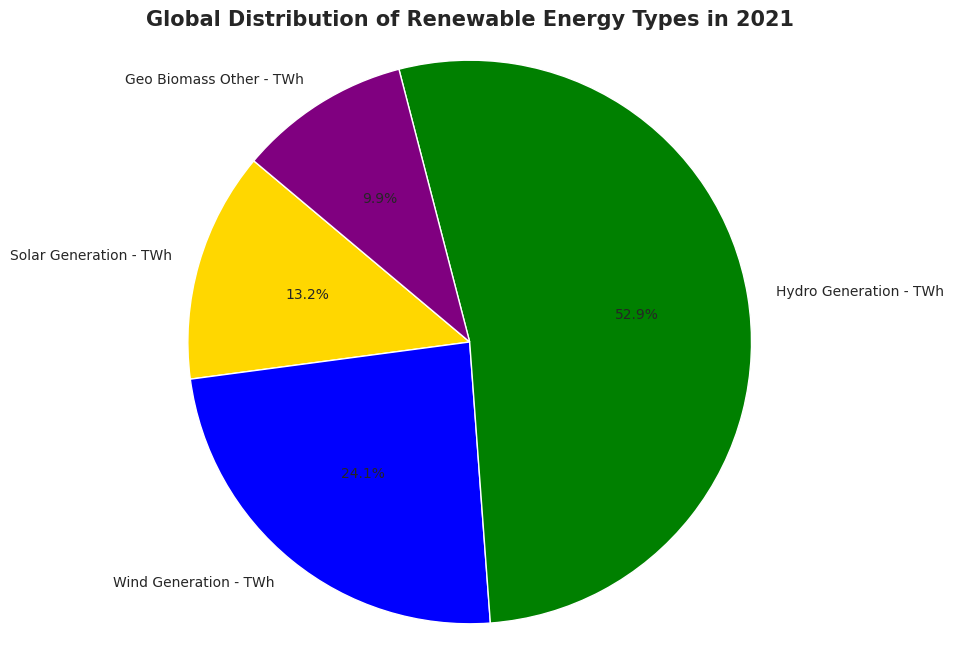

In [31]:
global_percentage_2021 = df_2[df_2['Year'] == 2021].sum(numeric_only=True)[['Solar Generation - TWh', 'Wind Generation - TWh', 'Hydro Generation - TWh', 'Geo Biomass Other - TWh']]
global_percentage_2021 = global_percentage_2021 / global_percentage_2021.sum() * 100

plt.figure(figsize=(8, 8))
plt.pie(global_percentage_2021, labels=global_percentage_2021.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'blue', 'green', 'purple'])
plt.title('Global Distribution of Renewable Energy Types in 2021', fontsize=15, fontweight='bold')
plt.axis('equal')
plt.show()

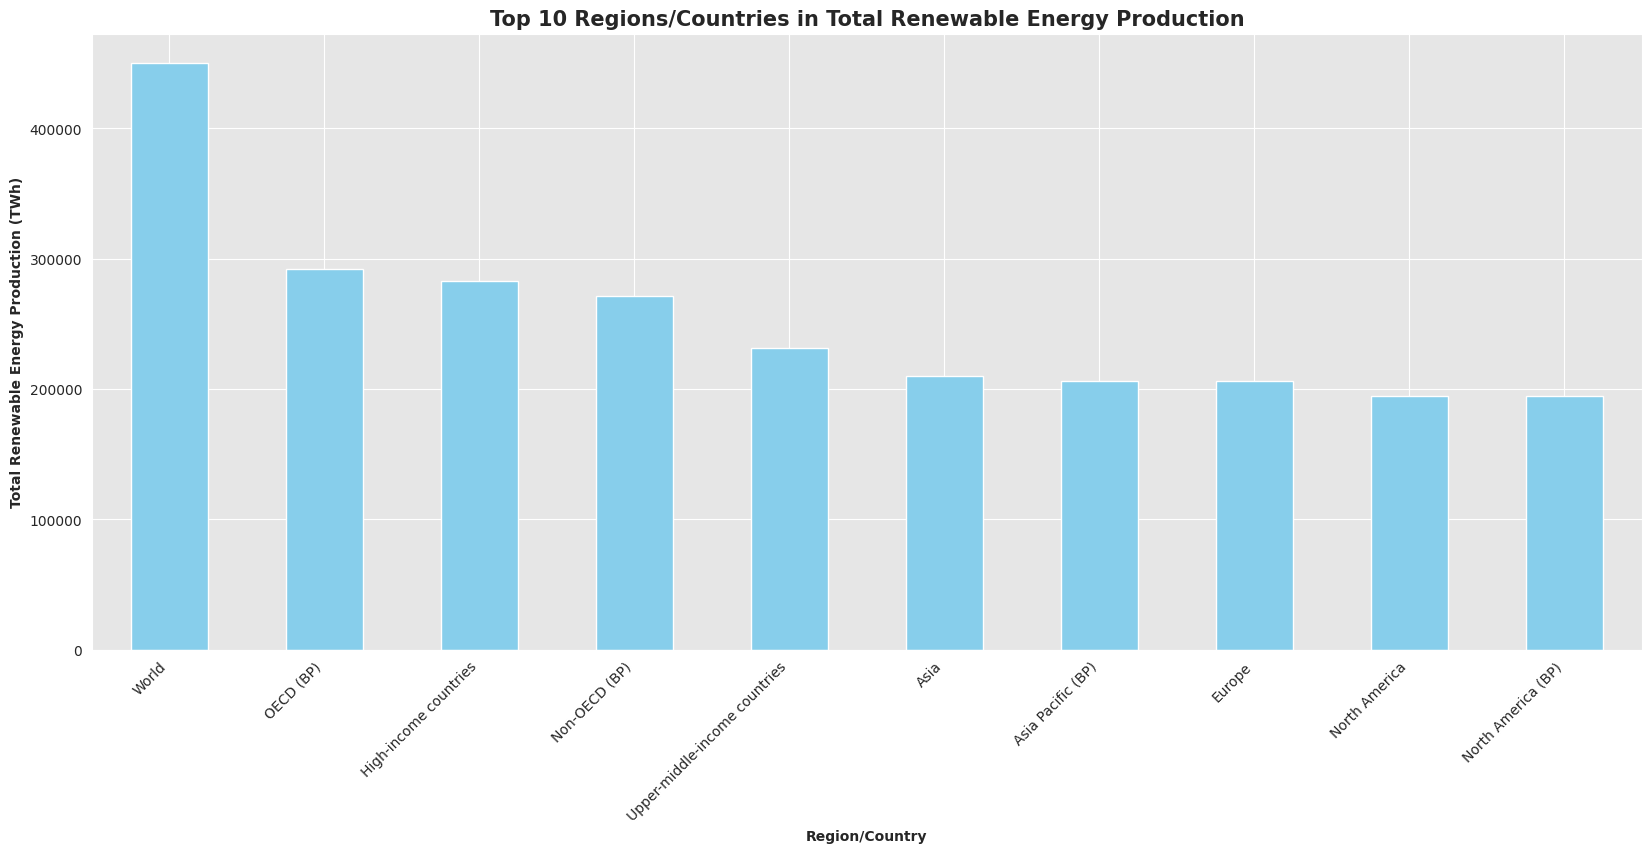

In [32]:
total_renewable_energy_by_region = df_2.groupby('Entity').sum(numeric_only=True).sum(axis=1).sort_values(ascending=False)

top_regions = total_renewable_energy_by_region.head(10)

plt.figure(figsize=(20, 8))
top_regions.plot(kind='bar', color='skyblue')
plt.title('Top 10 Regions/Countries in Total Renewable Energy Production', fontsize=15, fontweight='bold', weight='bold')
plt.xlabel('Region/Country', weight='bold')
plt.ylabel('Total Renewable Energy Production (TWh)', weight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()


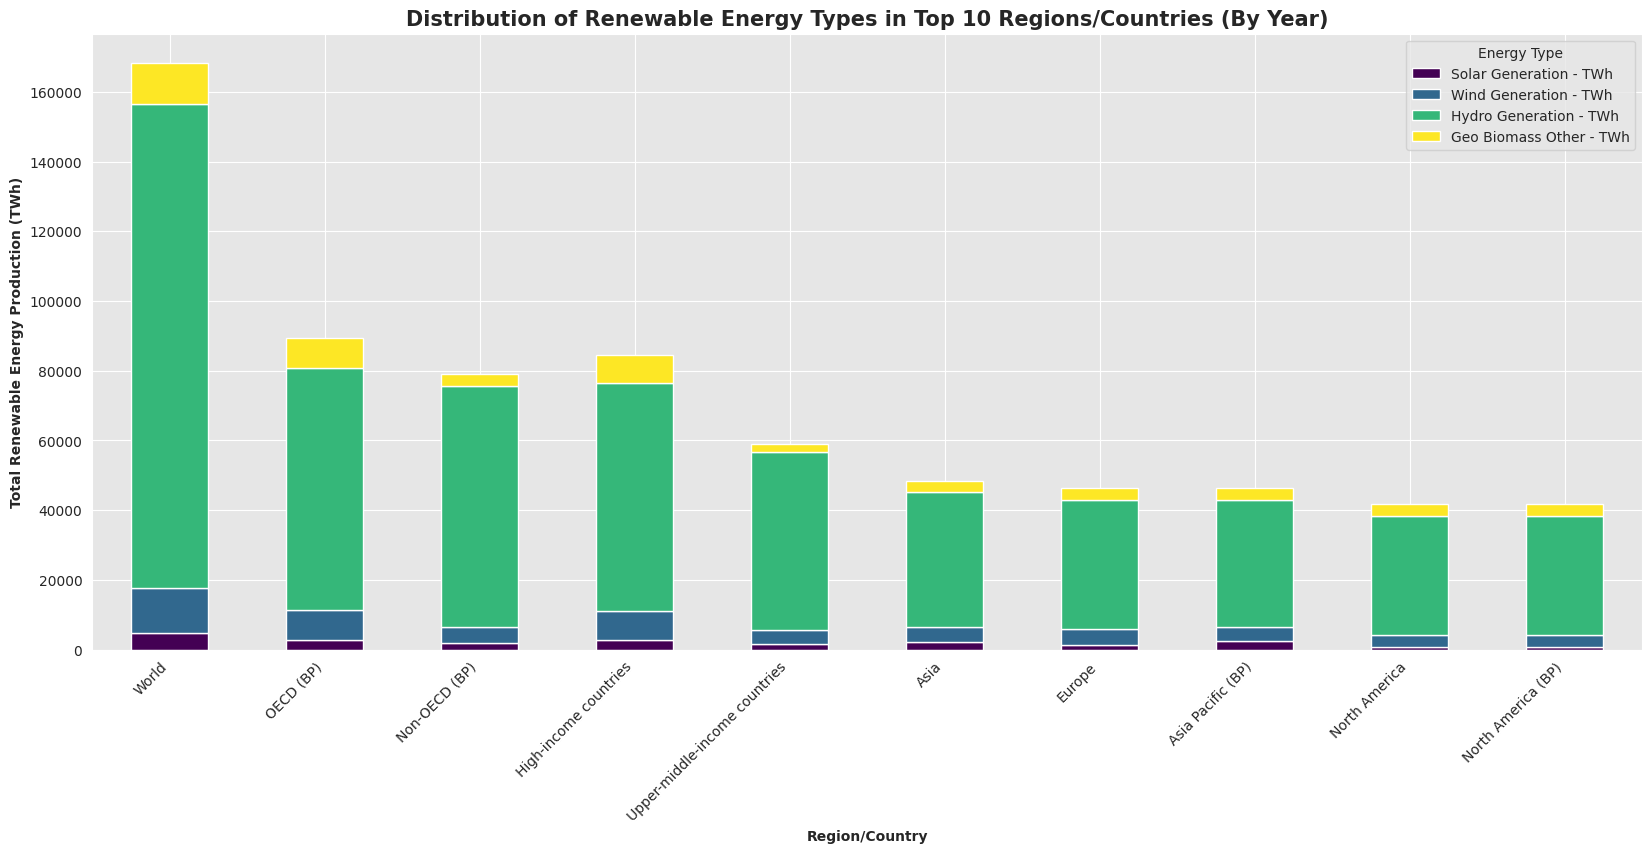

In [33]:
renewable_energy_distribution_by_region = df_2.groupby('Entity').sum(numeric_only=True)[['Solar Generation - TWh', 'Wind Generation - TWh', 'Hydro Generation - TWh', 'Geo Biomass Other - TWh']].sort_values(by='Hydro Generation - TWh', ascending=False)

top_regions_distribution = renewable_energy_distribution_by_region.head(10)

top_regions_distribution.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='viridis')
plt.title('Distribution of Renewable Energy Types in Top 10 Regions/Countries (By Year)', fontsize=15, weight='bold')
plt.xlabel('Region/Country', weight='bold')
plt.ylabel('Total Renewable Energy Production (TWh)', weight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Energy Type')
plt.show()

In [34]:
df_3 = pd.read_csv("/content/03 modern-renewable-prod.csv")

In [35]:
df_3.head()


,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.000,0.310,0.000,0.000
1,Afghanistan,AFG,2001,0.000,0.500,0.000,0.000
2,Afghanistan,AFG,2002,0.000,0.560,0.000,0.000
3,Afghanistan,AFG,2003,0.000,0.630,0.000,0.000
4,Afghanistan,AFG,2004,0.000,0.560,0.000,0.000


In [36]:
check_df(df_3)


Shape
(8851, 7)
Types
Head & Tail


,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.000000,0.310000,0.000000,0.000000
1,Afghanistan,AFG,2001,0.000000,0.500000,0.000000,0.000000
2,Afghanistan,AFG,2002,0.000000,0.560000,0.000000,0.000000
3,Afghanistan,AFG,2003,0.000000,0.630000,0.000000,0.000000
4,Afghanistan,AFG,2004,0.000000,0.560000,0.000000,0.000000


,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
8846,Zimbabwe,ZWE,2017,0.000000,3.970000,0.010000,0.320000
8847,Zimbabwe,ZWE,2018,0.000000,5.050000,0.020000,0.390000
8848,Zimbabwe,ZWE,2019,0.000000,4.170000,0.030000,0.380000
8849,Zimbabwe,ZWE,2020,0.000000,3.810000,0.030000,0.350000
8850,Zimbabwe,ZWE,2021,0.000000,4.000000,0.040000,0.380000


NA Values


,Column,Number of NA
0,Entity,0
1,Code,1555
2,Year,0
3,Electricity from wind (TWh),175
4,Electricity from hydro (TWh),11
5,Electricity from solar (TWh),168
6,Other renewables including bioenergy (TWh),220


Quantiles


,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Year,8851.00,1999.91,15.75,1965.00,1965.00,1969.00,2004.00,2020.00,2021.00,2022.00,2022.00
Electricity from wind (TWh),8676.00,14.57,86.39,0.00,0.00,0.00,0.00,35.82,433.23,1848.26,1848.26
Electricity from hydro (TWh),8840.00,116.58,360.23,0.00,0.00,0.00,3.53,697.49,1861.13,4340.61,4340.61
Electricity from solar (TWh),8683.00,5.28,40.10,0.00,0.00,0.00,0.00,5.33,158.19,1040.50,1040.50
Other renewables including bioenergy (TWh),8631.00,12.24,48.35,0.00,0.00,0.00,0.02,76.41,243.76,761.93,761.93


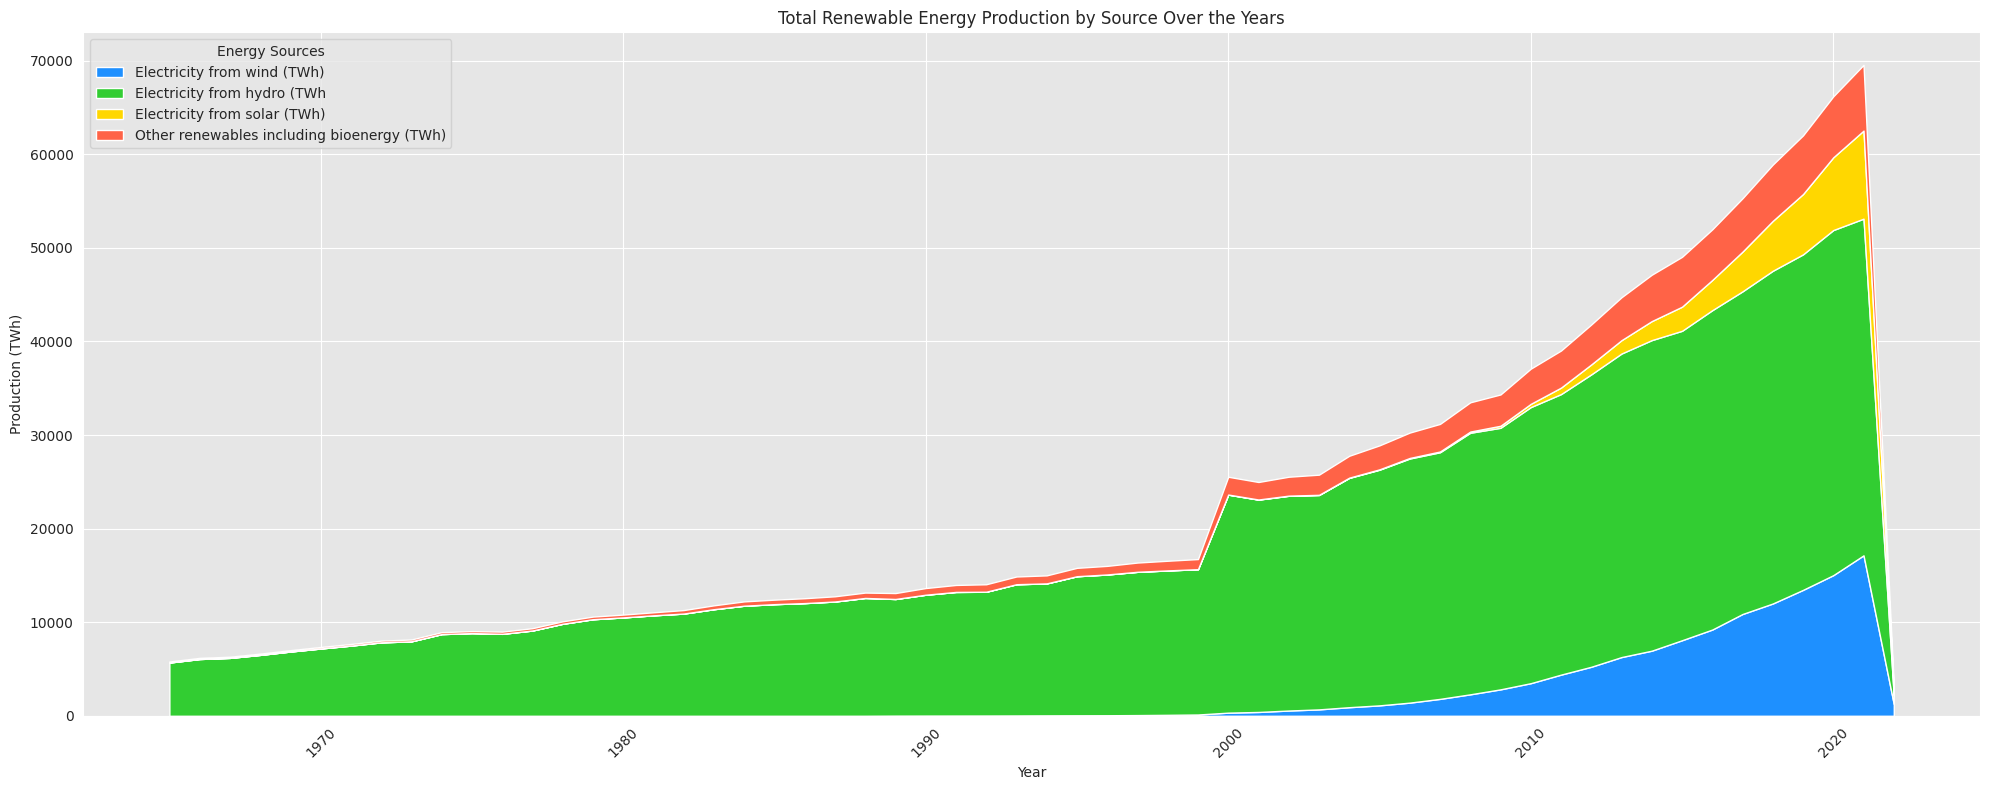

In [37]:
energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

total_renewable_by_source_yearly = df_3.groupby('Year')[energy_types].sum().reset_index()

colors = ['dodgerblue', 'limegreen', 'gold', 'tomato']

plt.figure(figsize=(20, 8))

plt.stackplot(total_renewable_by_source_yearly['Year'],
              total_renewable_by_source_yearly['Electricity from wind (TWh)'],
              total_renewable_by_source_yearly['Electricity from hydro (TWh)'],
              total_renewable_by_source_yearly['Electricity from solar (TWh)'],
              total_renewable_by_source_yearly['Other renewables including bioenergy (TWh)'],
              labels=['Electricity from wind (TWh)', 'Electricity from hydro (TWh', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)'], colors=colors)

plt.title('Total Renewable Energy Production by Source Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (TWh)')
plt.legend(loc='upper left', title='Energy Sources')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-38-65aa4eb7f300>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


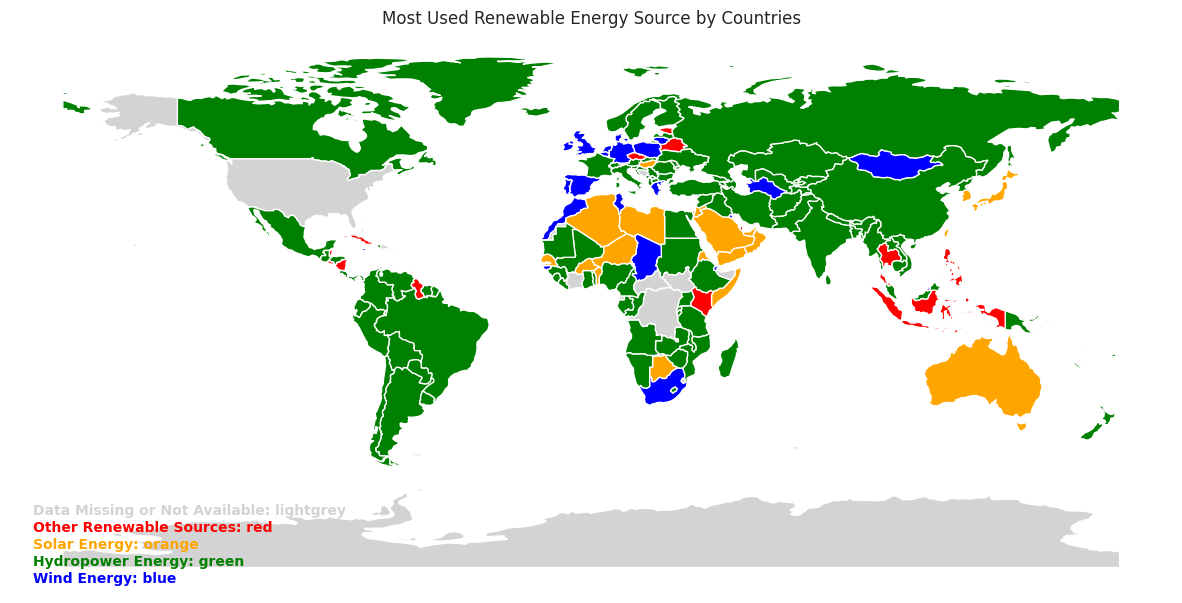

In [38]:
energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

latest_data = df_3.sort_values('Year').groupby('Entity').last().reset_index()

latest_data['Most Used Renewable Source'] = latest_data[energy_types].idxmax(axis=1)

color_map = {
    'Electricity from wind (TWh)': 'blue',
    'Electricity from hydro (TWh)': 'green',
    'Electricity from solar (TWh)': 'orange',
    'Other renewables including bioenergy (TWh)': 'red'
}
latest_data['Color'] = latest_data['Most Used Renewable Source'].map(color_map)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.set_index('name').join(latest_data.set_index('Entity'))

color_map[np.nan] = 'lightgrey'
merged['Color'] = merged['Color'].fillna('lightgrey')

def add_legend(ax):
    legend_labels = {
        'blue': 'Wind Energy',
        'green': 'Hydropower Energy',
        'orange': 'Solar Energy',
        'red': 'Other Renewable Sources',
        'lightgrey': 'Data Missing or Not Available'
    }
    for color, label in legend_labels.items():
        ax.annotate(
            f'{label}: {color}',
            xy=(0.02, 0.02 + list(color_map.values()).index(color) * 0.03),
            xycoords='axes fraction',
            fontsize=10,
            color=color,
            weight='bold'
        )

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(color=merged['Color'], ax=ax, legend=False)
add_legend(ax)
ax.set_title('Most Used Renewable Energy Source by Countries')
ax.set_axis_off()

plt.show()

<ipython-input-41-9a49a50f067a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[energy_type], y=df['Entity'], ax=ax, palette="viridis")
<ipython-input-41-9a49a50f067a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[energy_type], y=df['Entity'], ax=ax, palette="viridis")
<ipython-input-41-9a49a50f067a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[energy_type], y=df['Entity'], ax=ax, palette="viridis")
<ipython-input-41-9a49a50f067a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

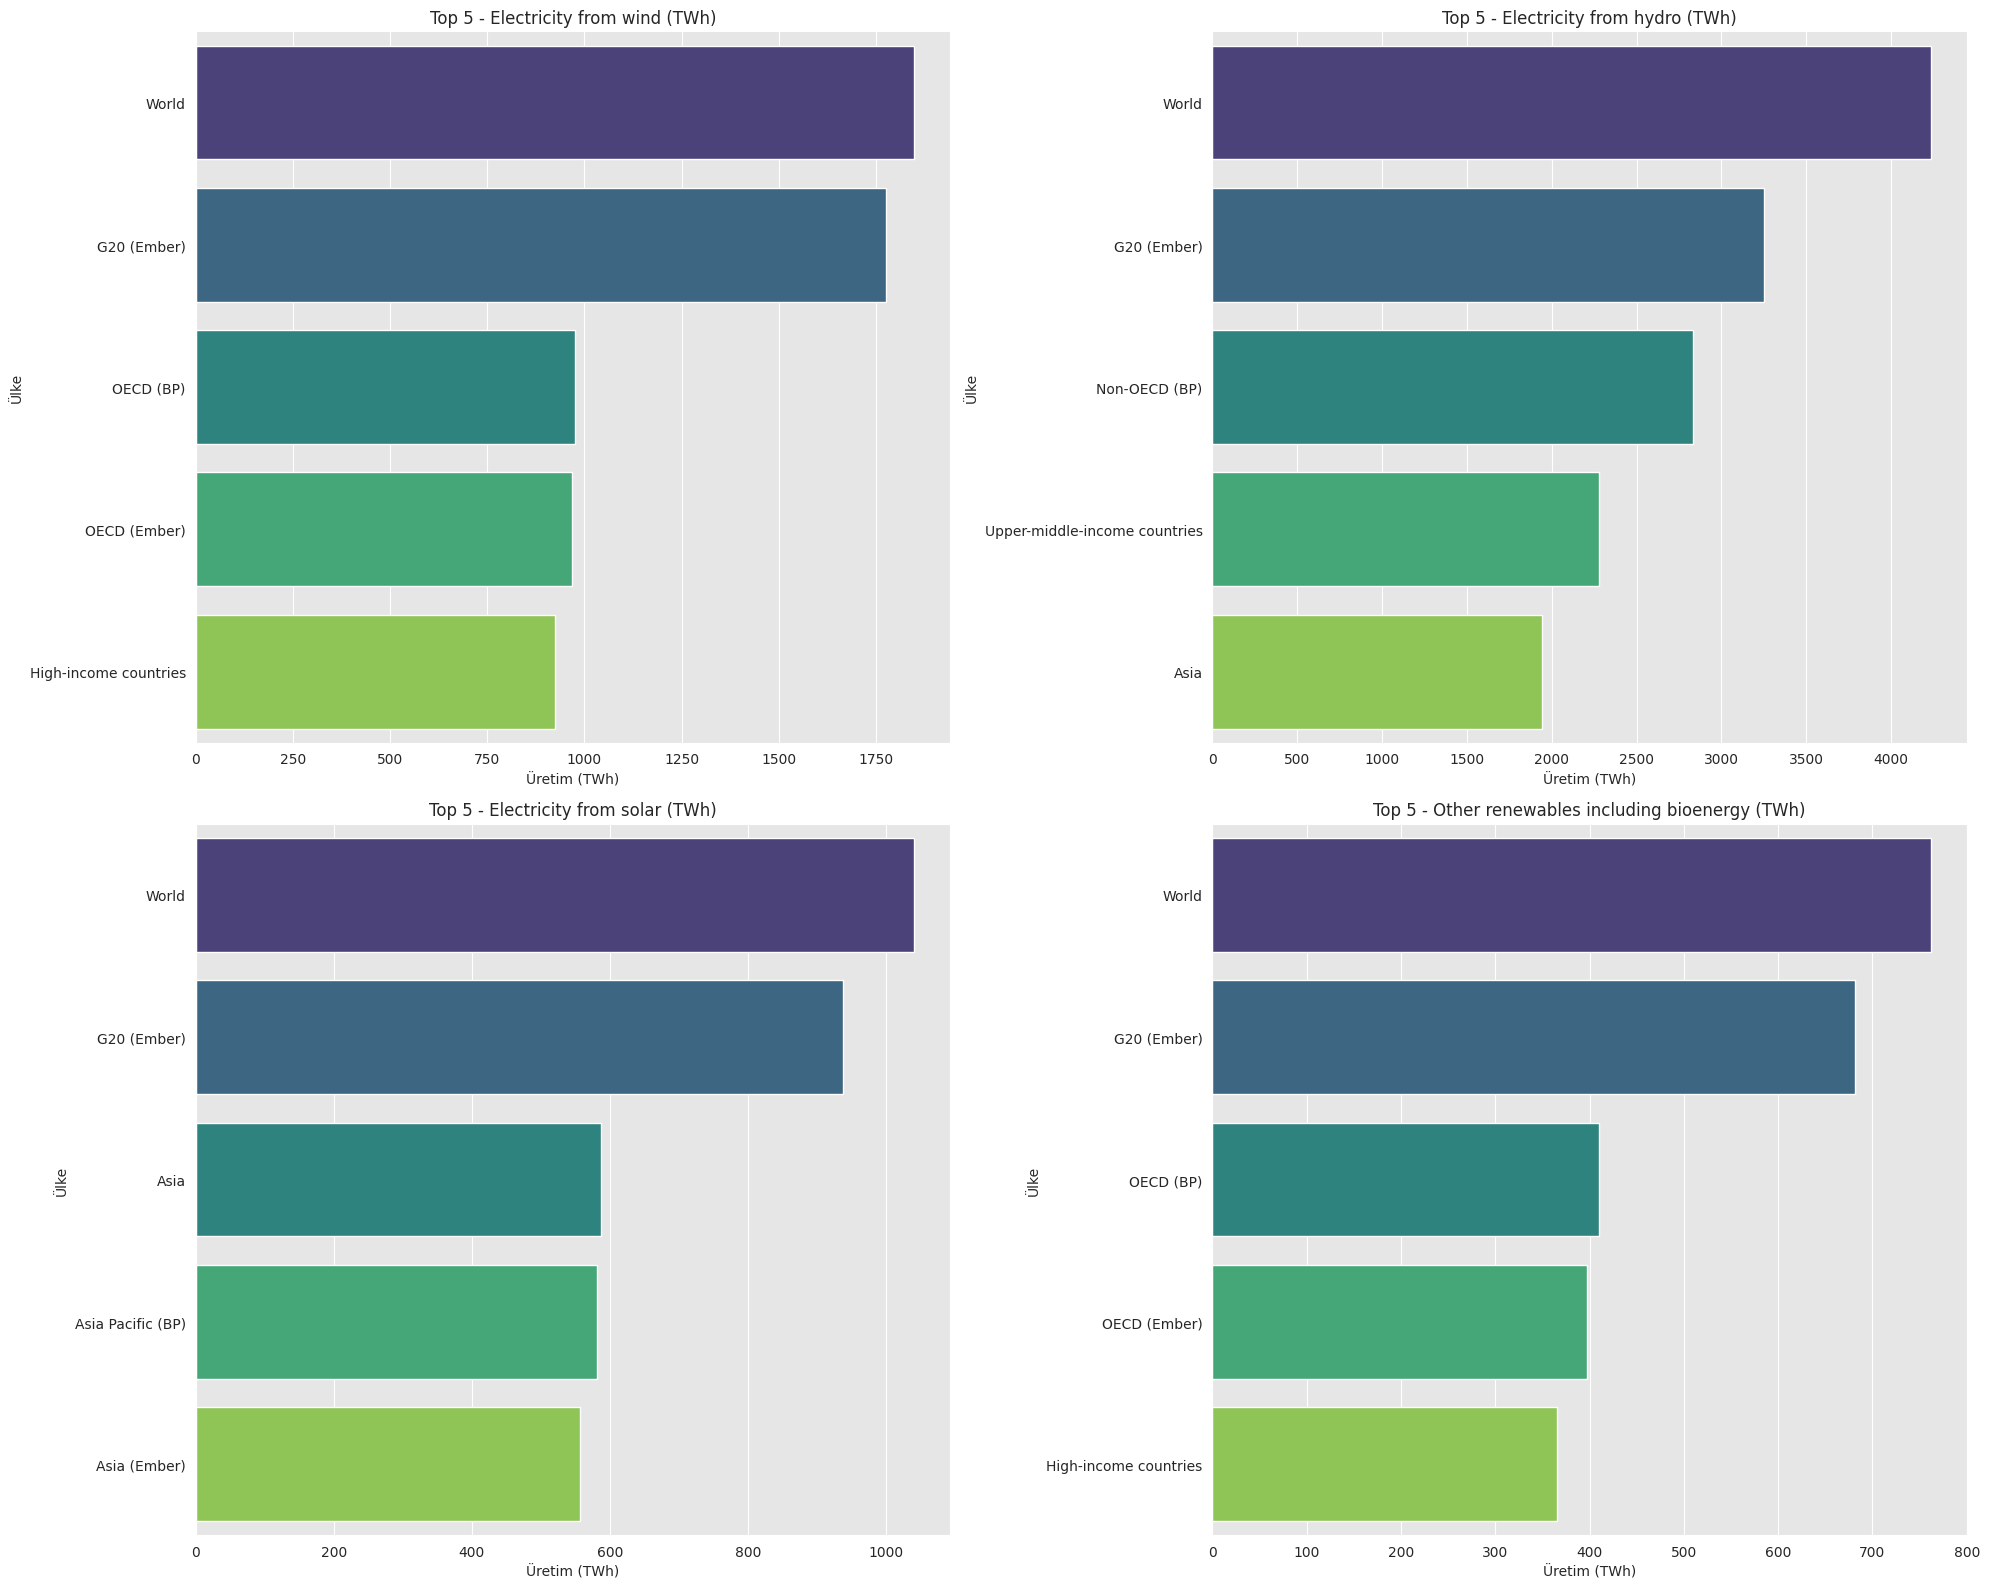

In [41]:
top_countries_by_source = {}
for energy_type in energy_types:
    top_countries = latest_data.sort_values(by=energy_type, ascending=False).head(5)
    top_countries_by_source[energy_type] = top_countries[['Entity', energy_type]]

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
for i, (energy_type, df) in enumerate(top_countries_by_source.items()):
    ax = axes[i // 2, i % 2]
    sns.barplot(x=df[energy_type], y=df['Entity'], ax=ax, palette="viridis")
    ax.set_title(f'Top 5 - {energy_type}')
    ax.set_xlabel('Üretim (TWh)')
    ax.set_ylabel('Ülke')

plt.tight_layout()
plt.show()

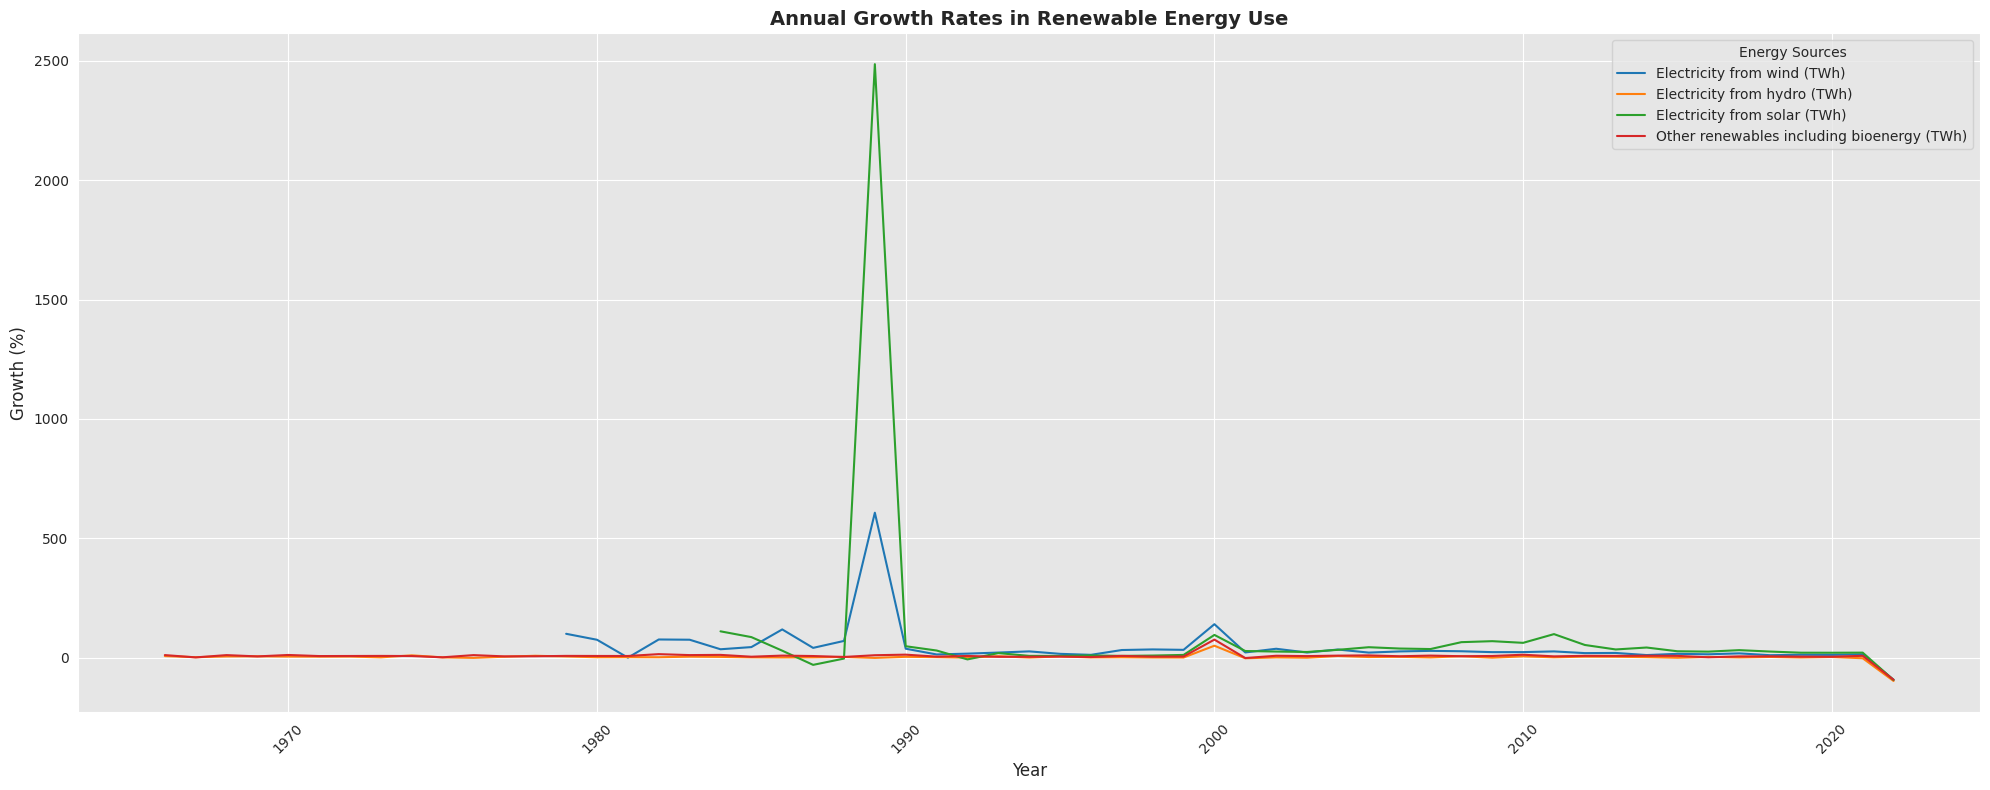

In [40]:
energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)',
                'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

total_renewable_comparison = df_3.groupby('Year')[energy_types].sum()
growth_rates = total_renewable_comparison.pct_change().multiply(100)

plt.figure(figsize=(20, 8))

palette = sns.color_palette("tab10", len(energy_types))

for i, energy_type in enumerate(energy_types):
    sns.lineplot(data=growth_rates, x=growth_rates.index, y=energy_type, label=energy_type, color=palette[i])

plt.title('Annual Growth Rates in Renewable Energy Use', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth (%)', fontsize=12)

plt.legend(title='Energy Sources')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
